# Tugas Besar IF2220 Probabilitas dan Statistika
# Penarikan Kesimpulan dan Pengujian Hipotesis
---
---
## Anggota
13521062 Go Dillon Audris

13521084 Austin Gabriel Pardosi

## Table Of Contents
1. [PREREQUISITE](#prerequisite)
2. [SOAL 1](#soal-1)
3. [SOAL 2](#soal-2)
   1. [Bagian 2.1 : Kolom Fixed Acidity](#soal-2-1)
   2. [Bagian 2.2 : Kolom Volatile Acidity](#soal-2-2)
   3. [Bagian 2.3 : Kolom Citric Acid](#soal-2-3)
   4. [Bagian 2.4 : Kolom Residual Sugar](#soal-2-4)
   5. [Bagian 2.5 : Kolom Chlorides](#soal-2-5)
   6. [Bagian 2.6 : Kolom Free Sulfur Dioxide](#soal-2-6)
   7. [Bagian 2.7 : Kolom Total Sulfur Dioxide](#soal-2-7)
   8. [Bagian 2.8 : Kolom Density](#soal-2-8)
   9. [Bagian 2.9 : Kolom pH](#soal-2-9)
   10. [Bagian 2.10 : Kolom Sulphates](#soal-2-10)
   11. [Bagian 2.11 : Kolom Alcohol](#soal-2-11)
   12. [Bagian 2.12 : Kolom Quality](#soal-2-12)
4. [SOAL 3](#soal-3)
   1. [Bagian 3.1 : Kolom Fixed Acidity](#soal-3-1)
   2. [Bagian 3.2 : Kolom Volatile Acidity](#soal-3-2)
   3. [Bagian 3.3 : Kolom Citric Acid](#soal-3-3)
   4. [Bagian 3.4 : Kolom Residual Sugar](#soal-3-4)
   5. [Bagian 3.5 : Kolom Chlorides](#soal-3-5)
   6. [Bagian 3.6 : Kolom Free Sulfur Dioxide](#soal-3-6)
   7. [Bagian 3.7 : Kolom Total Sulfur Dioxide](#soal-3-7)
   8. [Bagian 3.8 : Kolom Density](#soal-3-8)
   9. [Bagian 3.9 : Kolom pH](#soal-3-9)
   10. [Bagian 3.10 : Kolom Sulphates](#soal-3-10)
   11. [Bagian 3.11 : Kolom Alcohol](#soal-3-11)
   12. [Bagian 3.12 : Kolom Quality](#soal-3-12)
5. [SOAL 4](#soal-4)
   1. [Bagian 4.a](#soal-4-1)
   2. [Bagian 4.b](#soal-4-2)
   3. [Bagian 4.c](#soal-4-3)
   4. [Bagian 4.d](#soal-4-4)
   5. [Bagian 4.e](#soal-4-5)
5. [SOAL 5](#soal-5)
   1. [Bagian 5.a](#soal-5-1)
   2. [Bagian 5.b](#soal-5-2)
   3. [Bagian 5.c](#soal-5-3)
   4. [Bagian 5.d](#soal-5-4)
   5. [Bagian 5.e](#soal-5-5)

### PREREQUISITE <a id="prerequisite"></a>
---
---

Sebelum melakukan pengerjaan soal-soal tugas besar, dibutuhkan setup sebagai prerequisite atau tahap awal pengerjaan. Prerequisite dilakukan dengan melakukan import library dan mengubah file CSV menjadi sebuah dataframe yang nantinya akan digunakan.

In [2]:
# Melakukan import library yang diperlukan untuk melakukan tugas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Membaca file CSV dan menambahkan header pada dataframe
column = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]
data = pd.read_csv("anggur.csv", skiprows=1, names=column)

### SOAL 1 <a id="soal-1"></a>
---
---
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

Penulisan deskripsi statistik kolom dilakukan dengan menggunakan berbagai fungsi yang disediakan oleh library pandas seperti mean(), std(), quantile(), skew(), dan lain-lain. 

Kode berikut memberikan seluruh deskripsi statistik setiap kolom kecuali statistik modus.

In [69]:
# Deskripsi statistik seluruh kolom kecuali statistik modus
pd.concat([pd.DataFrame(data.count(), columns = ["Count"]).T,
           pd.DataFrame(data.mean(), columns = ["Mean"]).T,
           pd.DataFrame(data.median(), columns = ["Median"]).T,
           pd.DataFrame(data.std(), columns = ["Standar Deviation"]).T,
           pd.DataFrame(data.var(), columns = ["Variance"]).T,
           pd.DataFrame(data.max() - data.min(), columns = ["Range"]).T,
           pd.DataFrame(data.min(), columns = ["Minimum"]).T,
           pd.DataFrame(data.max(), columns = ["Maximum"]).T,
           data.describe().loc[["25%", "50%", "75%"]],
           pd.DataFrame(data.quantile(0.75) - data.quantile(0.25), columns = ["IQR"]).T,
           pd.DataFrame(data.skew(), columns = ["Skewness"]).T,
           pd.DataFrame(data.kurtosis(), columns = ["Kurtosis"]).T])

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
Count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
Mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
Median,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
Standar Deviation,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
Variance,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051
Range,8.170000,0.665200,0.292900,5.518200,0.125635,27.267847,66.810000,0.013800,0.740000,0.670000,8.990000,5.000000
Minimum,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
Maximum,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000


Terkhusus untuk deskripsi statistik modus, diperlukan pengecekan tambahan terhadap data. Hal ini dapat terjadi karena dua nilai data yang berbeda memiliki kemungkinan untuk menjadi modus akibat memiliki banyak kemunculan yang sama dan merupakan banyak kemunculan tertinggi. 

Kode berikut memberikan seluruh nilai modus pada suatu kolom.

In [70]:
# Deskripsi statistik modus seluruh kolom
print("Statistik Modus: ")
for column in data:
    modus = data[column].mode()

    print(column, end = "")
    for i in range(0, 25 - len(column)):
        print(" ", end = "")

    if (len(modus) != data.shape[0]):
        for j in range (len(modus)):
            if j != len(modus) - 1:
                print(modus[j], end = ", ")
            else :
                print(modus[j])
    else :
        print("Data unik, semua value adalah modus")

Statistik Modus: 
Fixed Acidity            6.54
Volatile Acidity         0.5546
Citric Acid              0.3019
Residual Sugar           Data unik, semua value adalah modus
Chlorides                Data unik, semua value adalah modus
Free Sulfur Dioxide      Data unik, semua value adalah modus
Total Sulfur Dioxide     35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51
Density                  0.9959, 0.9961, 0.9965, 0.997
pH                       3.34
Sulphates                0.59
Alcohol                  9.86, 10.31
Quality                  8


### SOAL 2 <a id="soal-2"></a>
---
---
Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

Visualisasi setiap kolom menjadi histogram dan boxplot dilakukan dengan memanfaatkan library matplotlib.         
Kode dibawah mendefinisikan fungsi yang dibutuhkan untuk memvisualisasikan kolom menjadi histogram dan boxplot.

In [71]:
# Fungsi untuk menghasilkan visualisasi plot distribusi setiap kolom dalam bentuk histogram dan boxplot
def vizualizePlot(column):
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))
    fig.suptitle(column + " Data Visualization", weight = 'bold')

    if (column == "Quality"):
        data[column].plot(kind = 'hist', bins = 6, rwidth = 0.85, ax = axes[0])
    else:
        data[column].plot(kind = 'hist', bins = 50, rwidth = 0.85, ax = axes[0])
        
    axes[0].set_title(column + " Data Histogram")
    axes[0].set_xlabel("Value")

    data.boxplot(column = column, ax = axes[1])
    axes[1].set_ylabel("Value")
    axes[1].set_title(column + " Data Boxplot")

Visualisasi beserta penjelasannya dibagi menjadi beberapa bagian berdasarkan kolom. 

#### Bagian 2.1 : Kolom Fixed Acidity <a id="soal-2-1"></a>
---

Pada kolom Fixed Acidity


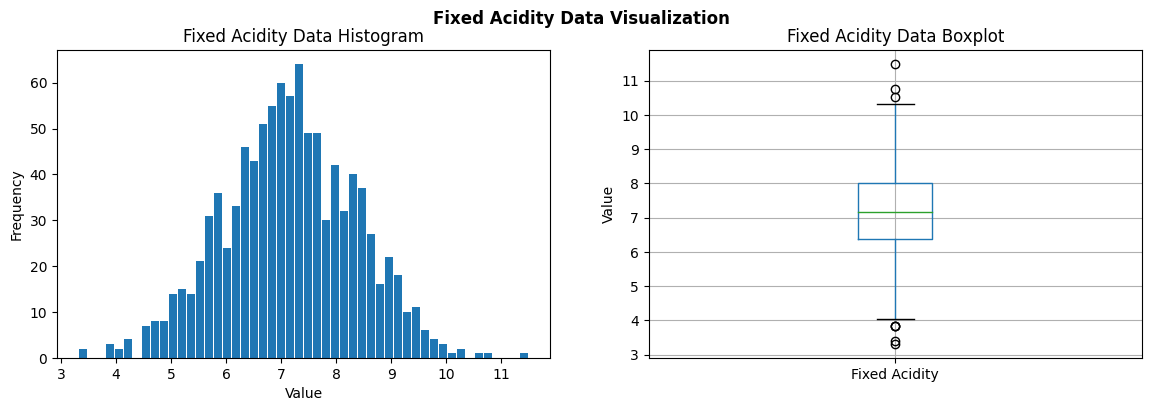

In [72]:
# Visualisasi Kolom Fixed Acidity
vizualizePlot("Fixed Acidity")

print("Pada kolom Fixed Acidity")

#### Bagian 2.2 : Kolom Volatile Acidity <a id="soal-2-2"></a>
---

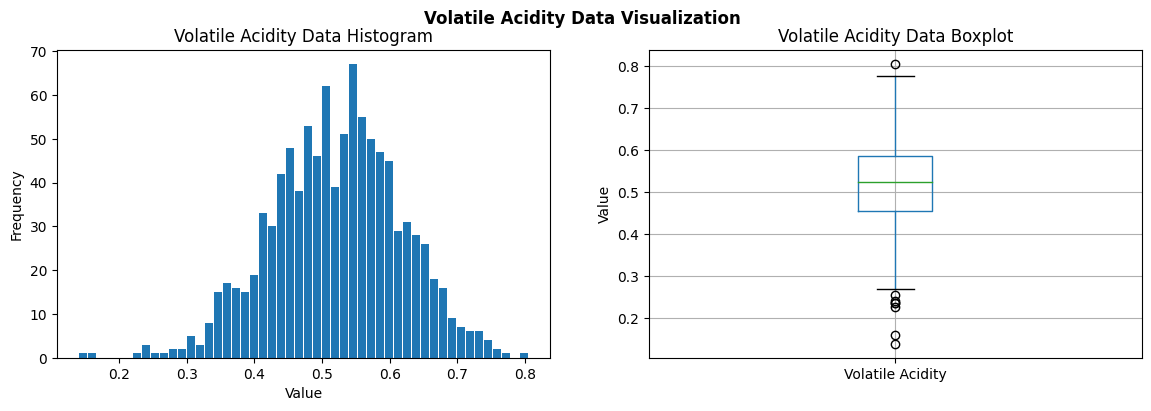

In [73]:
# Visualisasi Kolom Volatile Acidity
vizualizePlot("Volatile Acidity")

#### Bagian 2.3 : Kolom Citric Acid <a id="soal-2-3"></a>
---

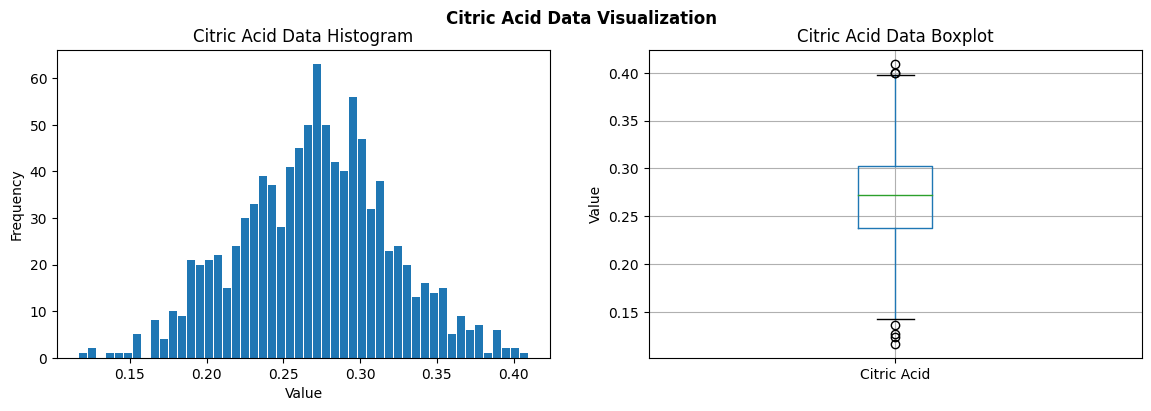

In [74]:
# Visualisasi Kolom Citric Acid
vizualizePlot("Citric Acid")

#### Bagian 2.4 : Kolom Residual Sugar <a id="soal-2-4"></a>
---

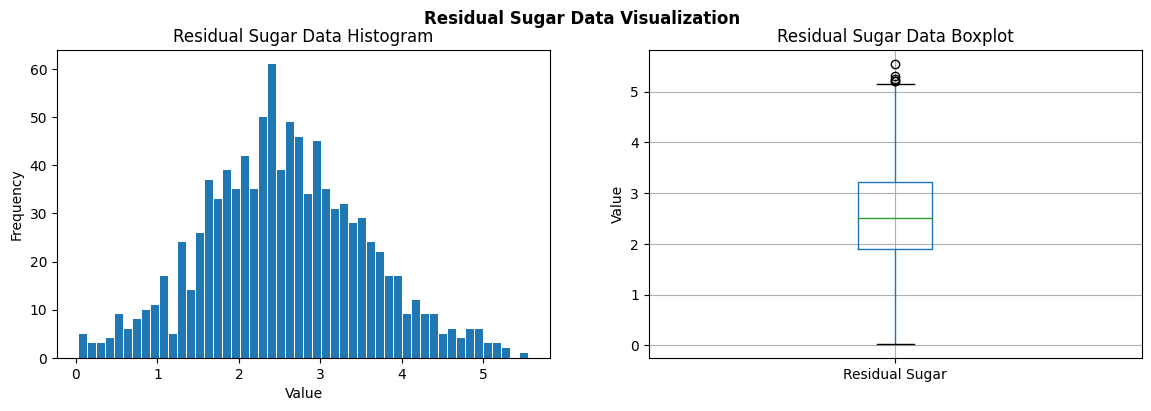

In [75]:
# Visualisasi Kolom Residual Sugar
vizualizePlot("Residual Sugar")

#### Bagian 2.5 : Kolom Chlorides <a id="soal-2-5"></a>
---

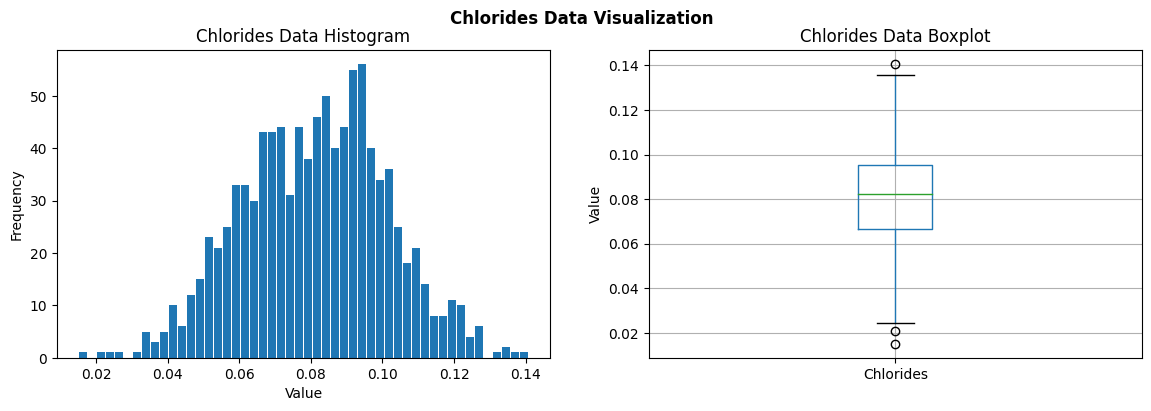

In [76]:
# Visualisasi Kolom Chlorides
vizualizePlot("Chlorides")

#### Bagian 2.6 : Kolom Free Sulfur Dioxide <a id="soal-2-6"></a>
---

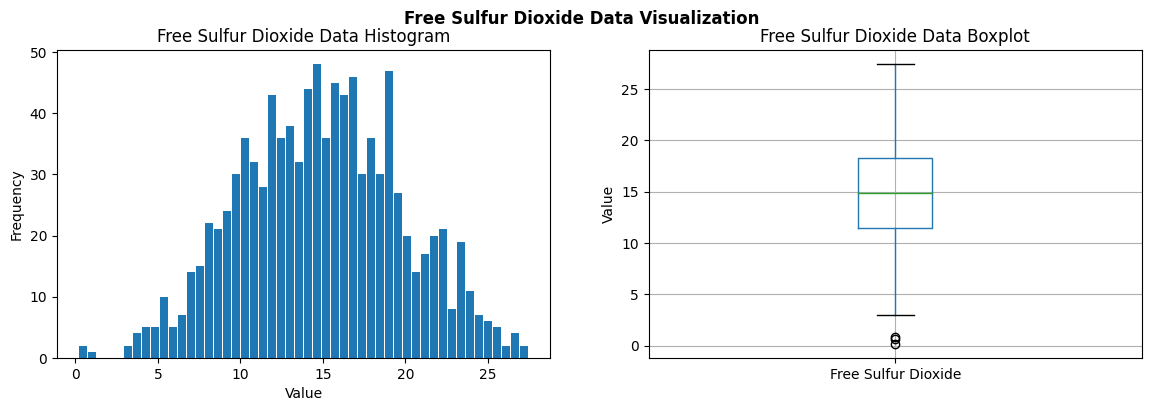

In [77]:
# Visualisasi Kolom Free Sulfur Dioxide
vizualizePlot("Free Sulfur Dioxide")

#### Bagian 2.7 : Kolom Total Sulfur Dioxide <a id="soal-2-7"></a>
---

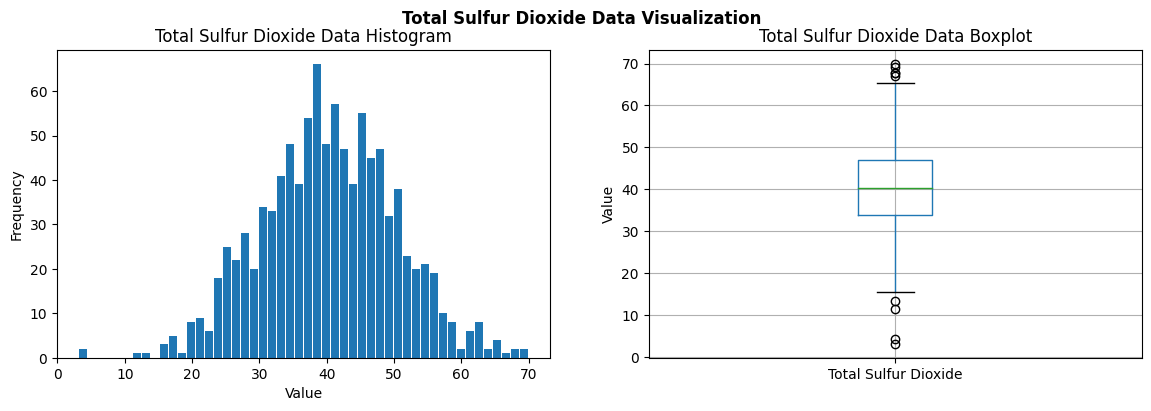

In [78]:
# Visualisasi Kolom Total Sulfur Dioxide
vizualizePlot("Total Sulfur Dioxide")

#### Bagian 2.8 : Kolom Density <a id="soal-2-8"></a>
---

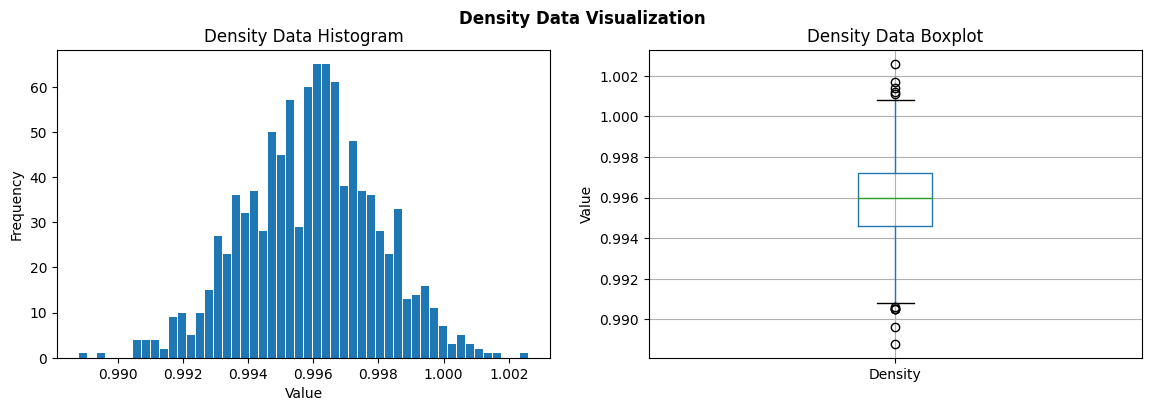

In [79]:
# Visualisasi Kolom Density
vizualizePlot("Density")

#### Bagian 2.9 : Kolom pH <a id="soal-2-9"></a>
---

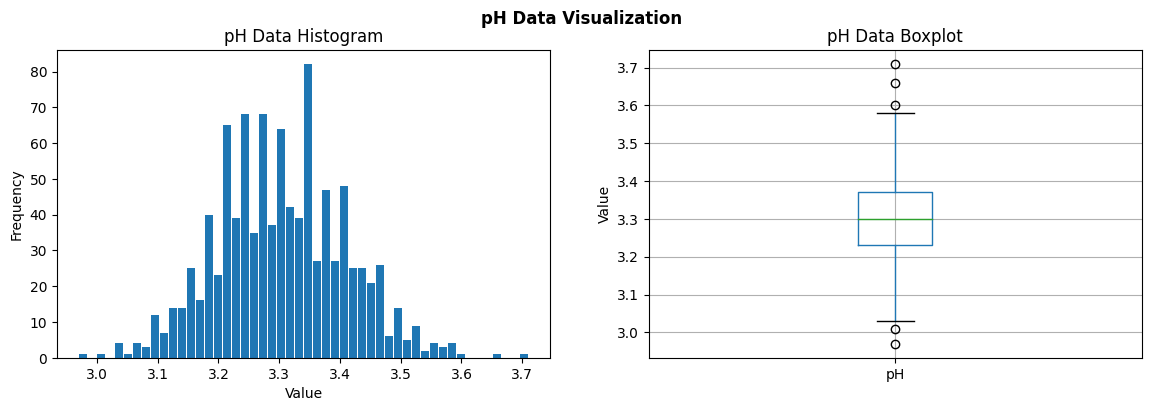

In [80]:
# Visualisasi Kolom pH
vizualizePlot("pH")

#### Bagian 2.10 : Kolom Sulphates <a id="soal-2-10"></a>
---

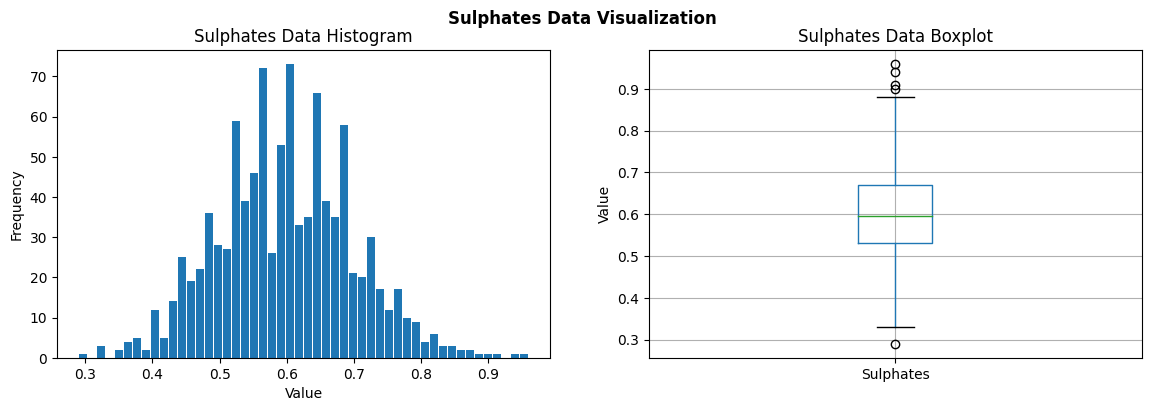

In [81]:
# Visualisasi Kolom Sulphates
vizualizePlot("Sulphates")

#### Bagian 2.11 : Kolom Alcohol <a id="soal-2-11"></a>
---

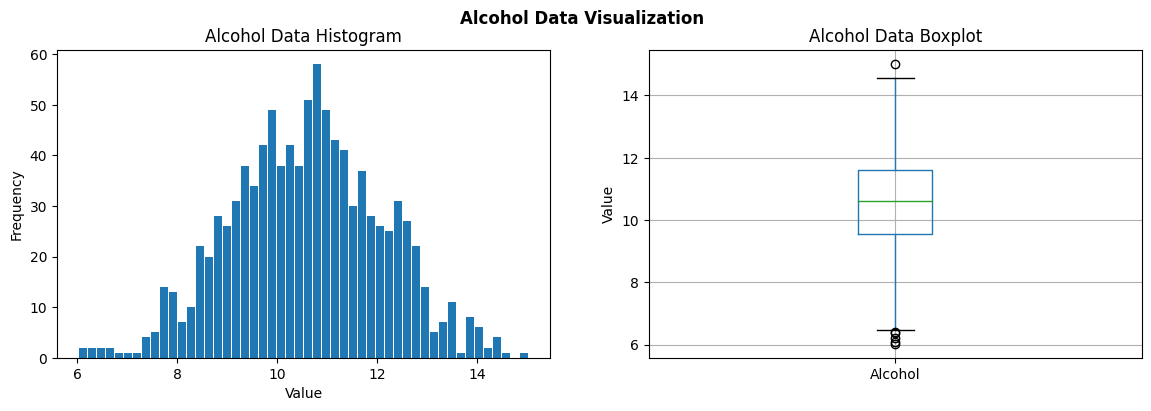

In [82]:
# Visualisasi Kolom Alcohol
vizualizePlot("Alcohol")

#### Bagian 2.12 : Kolom Quality <a id="soal-2-12"></a>
---

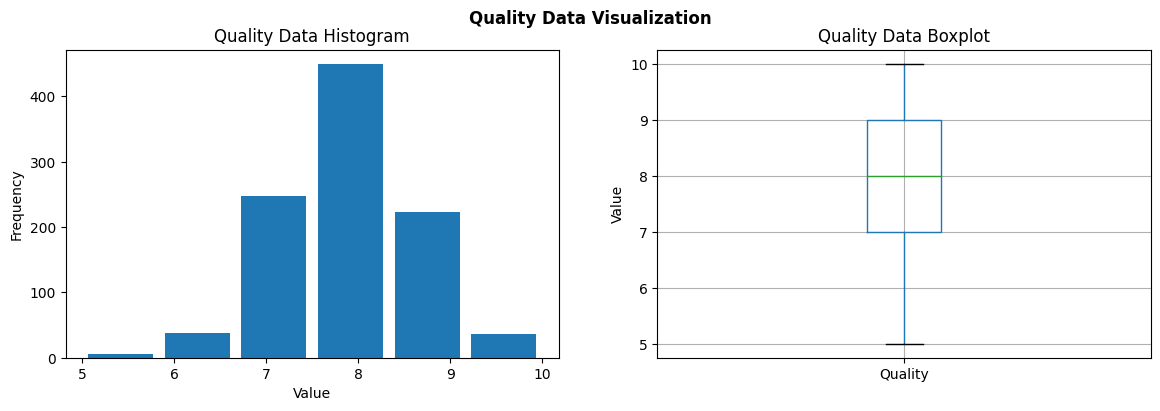

In [83]:
# Visualisasi Kolom Quality
vizualizePlot("Quality")

### SOAL 3 <a id="soal-3"></a>
---
---
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

Pada soal ini, tes normalitas terhadap data setiap kolom dilakukan dengan memanfaatkan fungsi normaltest() yang disediakan oleh library scipy.stats. Fungsi ini akan menerima sebuah data suatu kolom dan menentukan normalitas dengan menggunakan test D'Agostino dan Pearson. 

Tes normalitas D'Agostino dan Pearson atau lebih dikenal sebagai D'Agostino and Pearson Omnibus Normality Test merupakan suatu tes yang dilakukan untuk menentukan apakah data yang diberikan berdistribusi secara normal atau tidak. Secara singkat, tes ini akan melakukan pengujian terhadap hipotesis null H<sub>0</sub> bahwa data berasal dari populasi yang berdistribusi normal dengan tingkat signifikan sebesar $\alpha$. Keputusan terhadap hipotesis null kemudian akan diambil dengan membandingkan p-value tes terhadap $\alpha$. Hipotesis null H<sub>0</sub> akan ditolak jika p-value lebih kecil daripada $\alpha$, dan tidak ditolak jika p-value lebih besar daripada $\alpha$.

Tes normalitas D'Agostino dan Pearson dilakukan dengan memanfaatkan transformasi statistik skewness dan kurtosis dari sampel.
1. Biarlah g<sub>1</sub> dan g<sub>2</sub> merupakan skewness dan kurtosis dari sampel yang diberikan
2. Perlu dilakukan transformasi terhadap g<sub>1</sub> dan g<sub>2</sub> karena laju konvergensi g<sub>1</sub> dan g<sub>2</sub> menuju limit distribusi sangatlah lambat. Dengan memanfaatkan transformasi, maka diharapkan distribusi g<sub>1</sub> dan g<sub>2</sub> akan sedekat mungkin dengan distribusi normal standar. Transformasi ini dilambangkan dengan Z<sub>1</sub>(g<sub>1</sub>) dan Z<sub>2</sub>(g<sub>2</sub>)
3. Statistik Z<sub>1</sub>(g<sub>1</sub>) dan Z<sub>2</sub>(g<sub>2</sub>) kemudian digabung untuk mendapatkan nilai uji statistik berupa:

$$
K^2 = Z_1(g_1)^2 + Z_2(g_2)^2
$$

4. Jika hipotesis null H<sub>0</sub> mengenai normalitas adalah benar, maka K<sup>2</sup> berdistribusi chi-squared dengan derajat kebebasan sebesar 2. Dengan membandingkan p-value dari K<sup>2</sup> pada distribusi chi-squared dengan nilai $\alpha$, maka kita dapat mengambil keputusan mengenai hipotesis null H<sub>0</sub>

Dalam tes normalitas D'Agostino dan Pearson, akan diambil tingkat signifikan $\alpha$ sebesar 0.05. Dengan demikian, hipotesis null H<sub>0</sub> ditolak jika p-value lebih kecil dari 0.05, dan tidak ditolak jika p-value lebih besar dari 0.05

Untuk memperkuat tes normalitas D'Agostino dan Pearson, maka akan terdapat dua visualisasi terhadap data:
1. Visualisasi perbandingan antara histogram dan kurva normal dari data
2. Visualisasi plot probabilitas normal data

Dengan adanya perbandingan antara histogram dan kurva normal, maka kita dapat menentukan apakah data berdistribusi secara normal dengan cara yang berbeda. Hal ini dapat dilakukan dengan memperhatikan apakah histogram mengikuti kurva normal, memperhatikan bentuk dari histogram, dan memperhatikan ujung-ujung atau _tail_ dari histogram.

Visualisasi dengan plot probabilitas normal data menggunakan Q-Q plot, yaitu perbandingan quantile dari data sampel dengan quantile dari distribusi normal standar yang akan tampak membentuk suatu garis. Garis hasil plot kemudian akan dibandingkan dengan garis hasil plot distribusi normal standar. Jika garis hasil plot dari data yang ada menyerupai garis hasil plot distribusi normal standar, maka dapat dikatakan bahwa data berdistribusi secara normal.

Dari tes normalitas D'Agostino dan Pearson serta kedua visualisasi, akan ditarik kesimpulan apakah setiap kolom berdistribusi secara normal atau tidak.

Kode dibawah mendefinisikan fungsi yang dibutuhkan untuk membuat visualisasi perbandingan histogram dengan kurva normal serta plot probabilitas normal, serta menghasilkan nilai uji statistik dan p-value dari tes normalitas D'Agostino dan Pearson. Perlu diketahui bahwa histogram data akan dinormalisasi (parameter density = True) sehingga nilai frekuensi (pada sumbu Y) akan berkurang namun dengan proporsi yang sama seperti pada Soal 2. Hal ini diperlukan agar perbandingan antara histogram dan kurva normal dapat terlihat dengan jelas.

In [28]:
# Fungsi untuk menghasilkan nilai uji statistik, p-value, dan visualisasi yang dibutuhkan untuk melakukan tes normalitas data
def normalityTest(column):
    k2, pValue = stats.normaltest(data[column])
    print(f"Nilai K^2 dari data pada kolom {column} adalah {k2} dengan p-value sebesar {pValue}")
    
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))
    fig.suptitle("Normality Test on " + column + " Data", weight = 'bold')

    if (column == "Quality"):
        data[column].plot(kind = 'hist', bins = 6, rwidth = 0.85, density = True, ax = axes[0])
    else:
        data[column].plot(kind = 'hist', bins = 50, rwidth = 0.85, density = True, ax = axes[0])
        
    range = np.arange(data[column].min(), data[column].max(), 0.001)
    axes[0].plot(range, stats.norm.pdf(range, data[column].mean(), data[column].std()), linewidth = 2.5, color = 'red')
    axes[0].set_title(column + " Data Histogram and Normal Curve")
    axes[0].set_xlabel("Value")

    stats.probplot(data[column], plot = axes[1])
    axes[1].set_title(column + " Data Normal Probability Plot")
    axes[1].set_ylabel("Empirical Quantiles")

Hasil uji statistik dan visualisasi beserta kesimpulan mengenai data dibagi menjadi beberapa bagian berdasarkan kolom. 

#### Bagian 3.1 : Kolom Fixed Acidity <a id="soal-3-1"></a>
---

Nilai K^2 dari data pada kolom Fixed Acidity adalah 0.14329615661430725 dengan p-value sebesar 0.9308584274486692


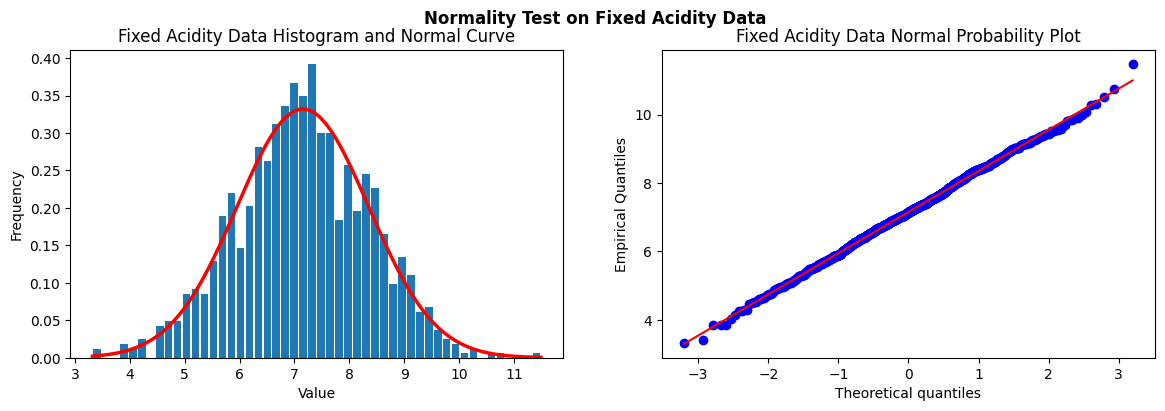

In [29]:
# Tes Normalitas Kolom Fixed Acidity
normalityTest('Fixed Acidity')

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.9308584274486692. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa histogram mengikuti kurva normal dan kedua ujung atau _tail_ dari histogram memiliki frekuensi yang sama. Selain itu, histogram juga membentuk sebuah bel dan memiliki simetri di sekitar nilai 7. Simetri yang terbentuk ini sejalan dengan fakta bahwa distribusi normal memiliki simetri pada meannya dan mean dari data Fixed Acidity berada pada nilai 7.152530.

Berdasarkan visualisasi plot probabilitas normal, terlihat bahwa distribusi data Fixed Acidity berada dalam satu garis dengan distribusi normal standar (garis merah). Meskipun terdapat beberapa titik yang tidak berada di dalam garis merah, hal ini dapat dimaklumi karena titik tersebut merupakan _outlier_ yang juga muncul pada visualisasi boxplot data.

Dapat disimpulkan bahwa **data pada kolom Fixed Acidity berdistribusi secara normal.**

#### Bagian 3.2 : Kolom Volatile Acidity <a id="soal-3-2"></a>
---

Nilai K^2 dari data pada kolom Volatile Acidity adalah 7.581251985533493 dengan p-value sebesar 0.022581461594113835


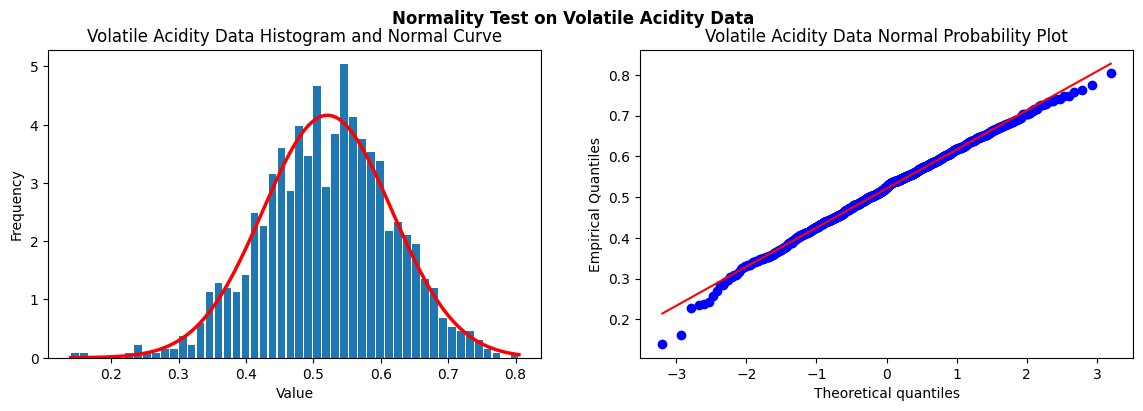

In [30]:
# Tes Normalitas Kolom Volatile Acidity
normalityTest("Volatile Acidity")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.022581461594113835. Karena p-value lebih kecil dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa meskipun histogram tampaknya mengikuti kurva normal, kedua ujung atau _tail_ dari histogram memiliki perbedaan. Terlihat bahwa _tail_ kiri dari histogram lebih panjang dibandingkan dengan _tail_ kanannya yang menunjukkan indikasi dari _left/negative skew_.

Berdasarkan visualisasi plot probabilitas normal, juga dapat terlihat bahwa titik-titik di ujung kiri dan kanan hasil plot keluar dari garis merah dan menyebabkan hasil plot terlihat sedikit cekung ke bawah yang mengindikasikan adanya _left/negative skew_. 

Dapat disimpulkan bahwa **data pada kolom Volatile Acidity tidak berdistribusi secara normal.**

#### Bagian 3.3 : Kolom Citric Acid <a id="soal-3-3"></a>
---

Nilai K^2 dari data pada kolom Citric Acid adalah 0.7663607229418252 dengan p-value sebesar 0.6816899375976969


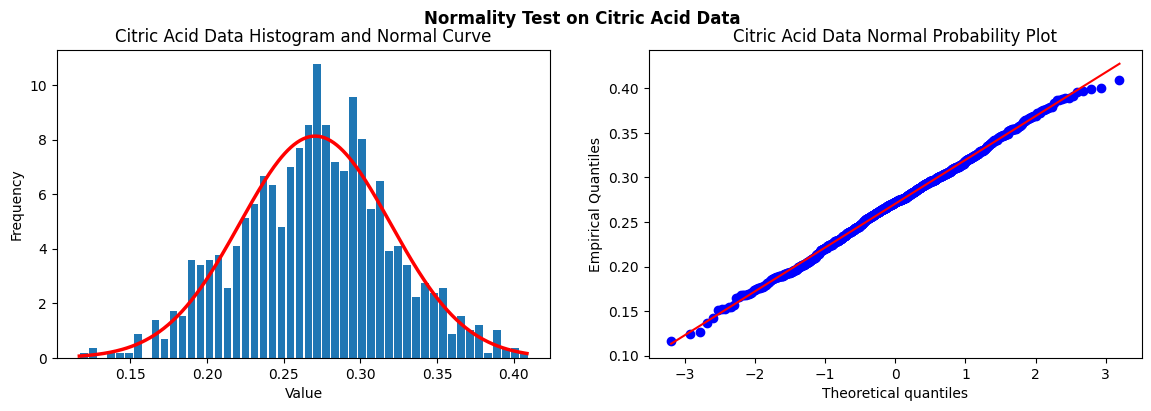

In [31]:
# Tes Normalitas Kolom Citric Acid
normalityTest("Citric Acid")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.6816899375976969. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa histogram mengikuti kurva normal dan kedua ujung atau _tail_ dari histogram memiliki frekuensi yang sama. Selain itu, histogram juga membentuk sebuah bel dan memiliki simetri di sekitar nilai 0.27. Simetri yang terbentuk ini sejalan dengan fakta bahwa distribusi normal memiliki simetri pada meannya dan mean dari data Citric Acid berada pada nilai 0.270517.

Berdasarkan visualisasi plot probabilitas normal, terlihat bahwa distribusi data Citric Acid berada dalam satu garis dengan distribusi normal standar (garis merah). Meskipun terdapat beberapa titik yang tidak berada di dalam garis merah, hal ini dapat dimaklumi karena titik tersebut merupakan _outlier_ yang juga muncul pada visualisasi boxplot data.

Dapat disimpulkan bahwa **data pada kolom Citric Acid berdistribusi secara normal.**

#### Bagian 3.4 : Kolom Residual Sugar <a id="soal-3-4"></a>
---

Nilai K^2 dari data pada kolom Residual Sugar adalah 2.9862716504538622 dengan p-value sebesar 0.2246670332131056


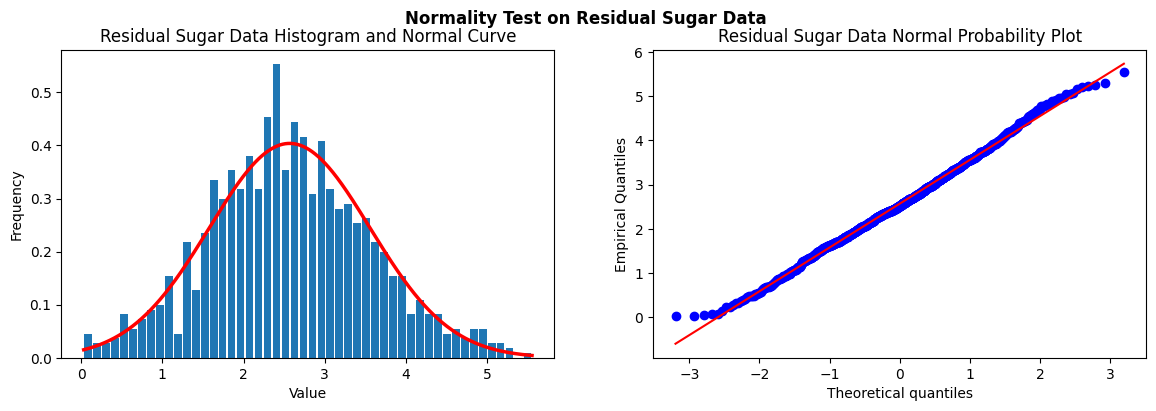

In [32]:
# Tes Normalitas Kolom Residual Sugar\
normalityTest("Residual Sugar")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.2246670332131056. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Meskipun demikian, visualisasi perbandingan histogram dengan kurva normal menunjukkan bahwa _tail_ kanan histogram sedikit lebih panjang dibandingkan _tail_ kiri histogram yang menginfikasikan _right/positive skew_. Bentuk histogram juga menunjukkan ketidaksamaan dengan kurva normal, dimana bagian tengah histogram tampak lebih rendah daripada bagian tengah kurva normal yang mengindikasikan bentuk _platykurtic_.

Berdasarkan visualisasi plot probabilitas normal, juga dapat terlihat bahwa titik-titik di ujung kiri plot berada di atas garis merah dan menyebabkan hasil plot terlihat sedikit cekung ke atas yang mengindikasikan adanya _right/positive skew_. 

Meski kedua visualisasi menunjukkan hasil yang berbeda dari tes normalitas, hal ini nampaknya dapat ditolerir oleh tes tersebut. Hasil pengamatan kedua visualisasi juga terlihat dari nilai p-value sebesar 0.2246670332131056. Nilai p-value ini cukup kecil jika dibandingkan dengan p-value kolom lain yang berdistribusi secara normal. Hal ini mengindikasikan distribusi Residual Sugar tidak "senormal" distribusi data yang lain. Meskipun demikian, distribusi Residual Sugar masih dianggap normal oleh tes normalitas.

Dapat disimpulkan bahwa **data pada kolom Residual Sugar berdistribusi secara normal.**

#### Bagian 3.5 : Kolom Chlorides <a id="soal-3-5"></a>
---

Nilai K^2 dari data pada kolom Chlorides adalah 3.538242355484952 dengan p-value sebesar 0.17048274704296862


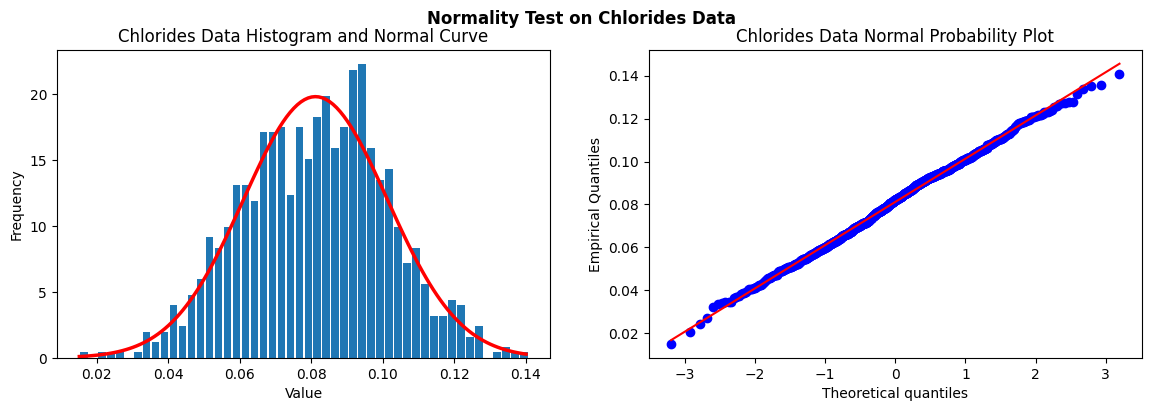

In [33]:
# Tes Normalitas Kolom Chlorides
normalityTest("Chlorides")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.17048274704296862. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Meskipun demikian, visualisasi perbandingan histogram dengan kurva normal menunjukkan bahwa _tail_ kanan histogram sedikit lebih panjang dibandingkan _tail_ kiri histogram yang menginfikasikan _right/positive skew_. Bentuk histogram juga menunjukkan ketidaksamaan dengan kurva normal, dimana bagian tengah histogram tampak lebih rendah daripada bagian tengah kurva normal yang mengindikasikan bentuk _platykurtic_.

Berdasarkan visualisasi plot probabilitas normal, juga dapat terlihat bahwa titik-titik di ujung kiri plot berada di atas garis merah dan menyebabkan hasil plot terlihat sedikit cekung ke atas yang mengindikasikan adanya _right/positive skew_. 

Meski kedua visualisasi menunjukkan hasil yang berbeda dari tes normalitas, hal ini nampaknya dapat ditolerir oleh tes tersebut. Hasil pengamatan kedua visualisasi juga terlihat dari nilai p-value sebesar 0.2246670332131056. Nilai p-value ini cukup kecil jika dibandingkan dengan p-value kolom lain yang berdistribusi secara normal. Hal ini mengindikasikan distribusi Chlorides tidak "senormal" distribusi data yang lain. Meskipun demikian, distribusi Chlorides masih dianggap normal oleh tes normalitas.

Dapat disimpulkan bahwa **data pada kolom Chlorides berdistribusi secara normal.**

#### Bagian 3.6 : Kolom Free Sulfur Dioxide <a id="soal-3-6"></a>
---

Nilai K^2 dari data pada kolom Free Sulfur Dioxide adalah 8.099074980855514 dengan p-value sebesar 0.01743043451827735


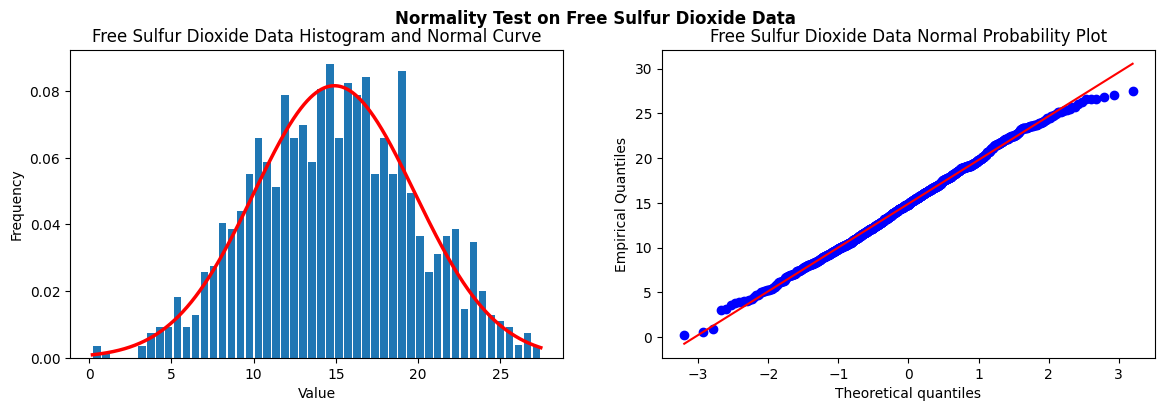

In [47]:
# Tes Normalitas Kolom Free Sulfur Dioxide
normalityTest("Free Sulfur Dioxide")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.01743043451827735. Karena p-value lebih kecil dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa meskipun histogram tampaknya mengikuti kurva normal, kedua ujung atau _tail_ dari histogram memiliki perbedaan. Terlihat bahwa _tail_ kiri dari histogram lebih panjang dibandingkan dengan _tail_ kanannya yang menunjukkan indikasi dari _left/negative skew_.

Berdasarkan visualisasi plot probabilitas normal, juga dapat terlihat bahwa titik-titik di ujung kiri dan kanan hasil plot keluar dari garis merah dan menyebabkan hasil plot terlihat sedikit cekung ke atas lalu ke bawah. Hal ini mengindikasikan adanya keseragaman atau _uniform_. 

Dapat disimpulkan bahwa **data pada kolom Free Sulfur Dioxide tidak berdistribusi secara normal.**

#### Bagian 3.7 : Kolom Total Sulfur Dioxide <a id="soal-3-7"></a>
---

Nilai K^2 dari data pada kolom Total Sulfur Dioxide adalah 0.3276640291639825 dengan p-value sebesar 0.8488846101395726


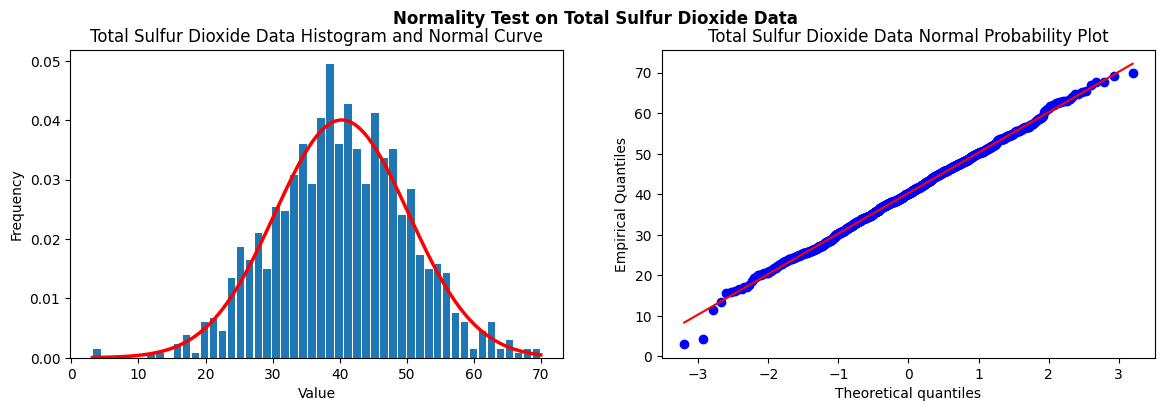

In [35]:
# Tes Normalitas Kolom Total Sulfur Dioxide
normalityTest("Total Sulfur Dioxide")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.8488846101395726. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa histogram mengikuti kurva normal. Meskipun demikian, _tail_ kiri dari histogram tampaknya lebih panjang dari _tail_ kanan. Namun hal ini tidak menjadi masalah karena panjangnya _tail_ kiri diakibatkan oleh adanya _outlier_ pada data. Selain daripada itu, histogram membentuk sebuah bel dan memiliki simetri di sekitar nilai 40. Simetri yang terbentuk ini sejalan dengan fakta bahwa distribusi normal memiliki simetri pada meannya dan mean dari data Total Sulfur Dioxide berada pada nilai 40.290150.

Berdasarkan visualisasi plot probabilitas normal, terlihat bahwa distribusi data Total Sulfur Dioxide berada dalam satu garis dengan distribusi normal standar (garis merah). Meskipun terdapat beberapa titik yang tidak berada di dalam garis merah, hal ini dapat dimaklumi karena titik tersebut merupakan _outlier_ yang juga muncul pada visualisasi boxplot data.

Dapat disimpulkan bahwa **data pada kolom Total Sulfur Dioxide berdistribusi secara normal.**

#### Bagian 3.8 : Kolom Density <a id="soal-3-8"></a>
---

Nilai K^2 dari data pada kolom Density adalah 1.026581544320803 dengan p-value sebesar 0.5985227325531981


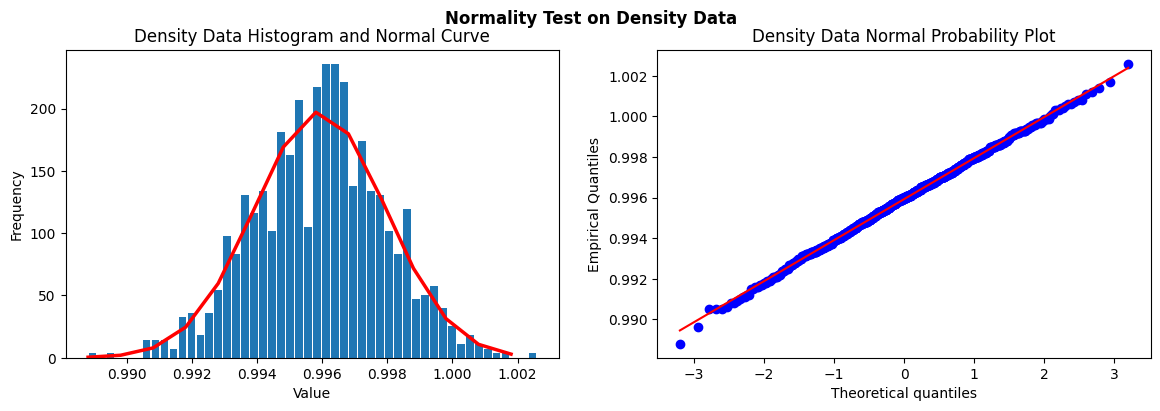

In [43]:
# Tes Normalitas Kolom Density
normalityTest("Density")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.5985227325531981. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa histogram mengikuti kurva normal dan kedua ujung atau _tail_ dari histogram memiliki frekuensi yang sama. Selain itu, histogram juga membentuk sebuah bel dan memiliki simetri di sekitar nilai 0.996. Simetri yang terbentuk ini sejalan dengan fakta bahwa distribusi normal memiliki simetri pada meannya dan mean dari data Density berada pada nilai 0.995925.

Berdasarkan visualisasi plot probabilitas normal, terlihat bahwa distribusi data Density berada dalam satu garis dengan distribusi normal standar (garis merah). Meskipun terdapat beberapa titik yang tidak berada di dalam garis merah, hal ini dapat dimaklumi karena titik tersebut merupakan _outlier_ yang juga muncul pada visualisasi boxplot data.

Dapat disimpulkan bahwa **data pada kolom Density berdistribusi secara normal.**

#### Bagian 3.9 : Kolom pH <a id="soal-3-9"></a>
---

Nilai K^2 dari data pada kolom pH adalah 3.9786546459928545 dengan p-value sebesar 0.13678740824860436


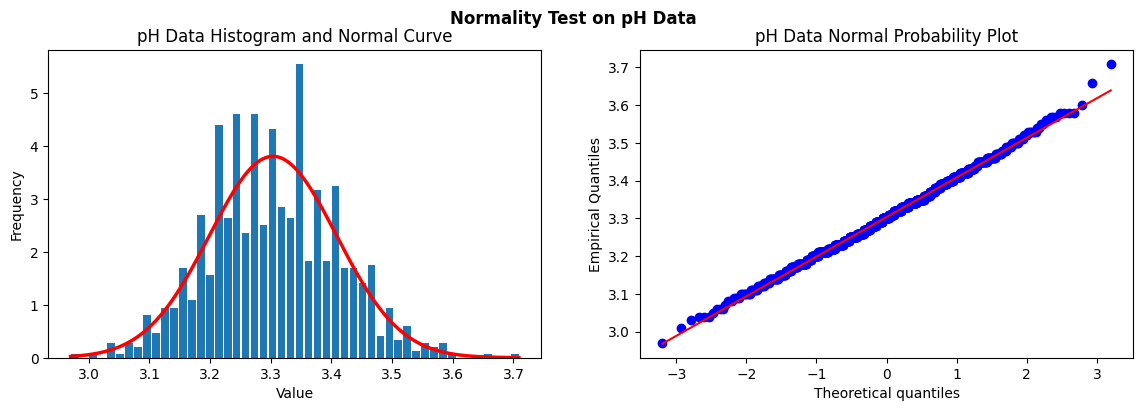

In [45]:
# Tes Normalitas Kolom pH
normalityTest("pH")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.13678740824860436. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Meskipun demikian, visualisasi perbandingan histogram dengan kurva normal menunjukkan bahwa _tail_ kanan histogram sedikit lebih panjang dibandingkan _tail_ kiri histogram yang menginfikasikan _right/positive skew_. Bentuk histogram juga menunjukkan ketidaksamaan dengan kurva normal, dimana bagian tengah histogram tampak lebih rendah daripada bagian tengah kurva normal yang mengindikasikan bentuk _platykurtic_. Beberapa _bins_ dari histogram juga jauh lebih tinggi dibandingkan kurva normal.

Sedangkan berdasarkan visualisasi plot probabilitas normal, terlihat bahwa distribusi data pH berada dalam satu garis dengan distribusi normal standar (garis merah). Meskipun terdapat beberapa titik yang tidak berada di dalam garis merah, hal ini dapat dimaklumi karena titik tersebut merupakan _outlier_ yang juga muncul pada visualisasi boxplot data.

Meski visualisasi perbandingan histogram dengan kurva normal menunjukkan hasil yang berbeda dari tes normalitas, hal ini nampaknya dapat ditolerir oleh tes tersebut. Hasil pengamatan visualisasi tersebut juga terlihat dari nilai p-value sebesar 0.13678740824860436. Nilai p-value ini cukup kecil jika dibandingkan dengan p-value kolom lain yang berdistribusi secara normal. Hal ini mengindikasikan distribusi pH tidak "senormal" distribusi data yang lain. Meskipun demikian, distribusi pH masih dianggap normal oleh tes normalitas.

Dapat disimpulkan bahwa **data pada kolom pH berdistribusi secara normal.**

#### Bagian 3.10 : Kolom Sulphates <a id="soal-3-10"></a>
---

Nilai K^2 dari data pada kolom Sulphates adalah 3.948820277859041 dengan p-value sebesar 0.13884318628391681


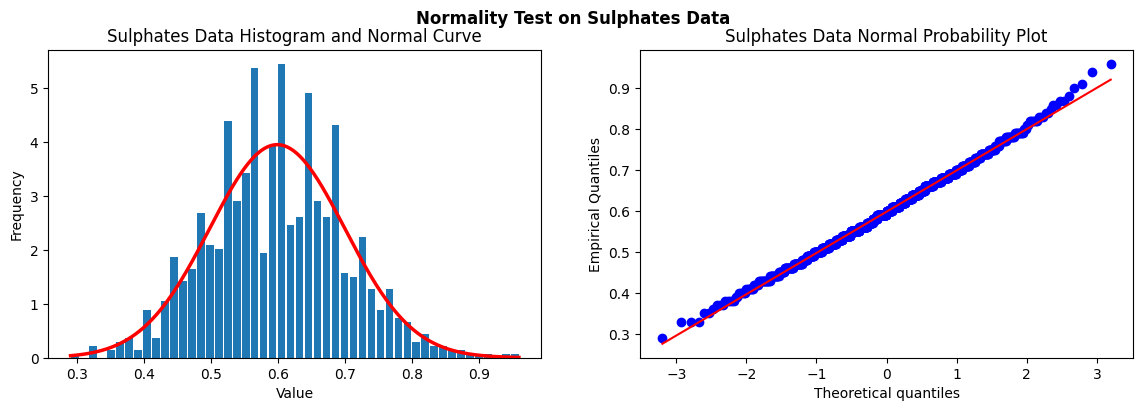

In [39]:
# Tes Normalitas Kolom Sulphates
normalityTest("Sulphates")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.13884318628391681. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Meskipun demikian, visualisasi perbandingan histogram dengan kurva normal menunjukkan bahwa _tail_ kanan histogram sedikit lebih panjang dibandingkan _tail_ kiri histogram yang menginfikasikan _right/positive skew_. Bentuk histogram juga menunjukkan ketidaksamaan dengan kurva normal, dimana bagian tengah histogram tampak lebih rendah daripada bagian tengah kurva normal yang mengindikasikan bentuk _platykurtic_. Beberapa _bins_ dari histogram juga jauh lebih tinggi dibandingkan kurva normal.

Berdasarkan visualisasi plot probabilitas normal, juga dapat terlihat bahwa titik-titik di ujung kiri dan kanan plot berada di atas garis merah dan menyebabkan hasil plot terlihat sedikit cekung ke atas yang mengindikasikan adanya _right/positive skew_. 

Meski kedua visualisasi menunjukkan hasil yang berbeda dari tes normalitas, hal ini nampaknya dapat ditolerir oleh tes tersebut. Hasil pengamatan kedua visualisasi juga terlihat dari nilai p-value sebesar 0.13884318628391681. Nilai p-value ini cukup kecil jika dibandingkan dengan p-value kolom lain yang berdistribusi secara normal. Hal ini mengindikasikan distribusi Sulphates tidak "senormal" distribusi data yang lain. Meskipun demikian, distribusi Sulphates masih dianggap normal oleh tes normalitas.

Dapat disimpulkan bahwa **data pada kolom Sulphates berdistribusi secara normal.**

#### Bagian 3.11 : Kolom Alcohol <a id="soal-3-11"></a>
---

Nilai K^2 dari data pada kolom Alcohol adalah 0.7740076714171271 dengan p-value sebesar 0.6790884901361043


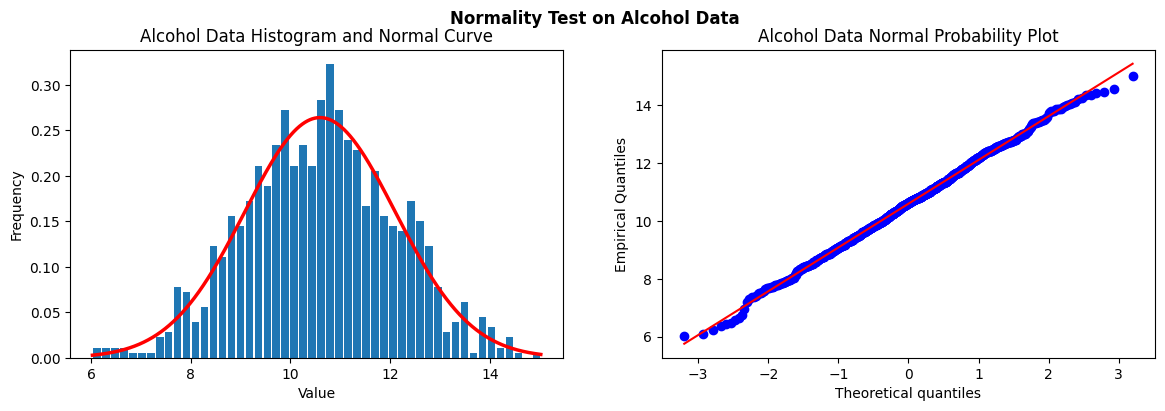

In [44]:
# Tes Normalitas Kolom Alcohol
normalityTest("Alcohol")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.6790884901361043. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Visualisasi perbandingan histogram dengan kurva normal juga menunjukkan bahwa histogram mengikuti kurva normal dan kedua ujung atau _tail_ dari histogram memiliki frekuensi yang sama. Selain itu, histogram juga membentuk sebuah bel dan memiliki simetri di sekitar nilai 10.6. Simetri yang terbentuk ini sejalan dengan fakta bahwa distribusi normal memiliki simetri pada meannya dan mean dari data Alcohol berada pada nilai 10.592280.

Berdasarkan plot probabilitas normal, terlihat bahwa distribusi data Alcohol berada dalam satu garis dengan distribusi normal standar (garis merah). Meskipun terdapat beberapa titik yang tidak berada di dalam garis merah, hal ini dapat dimaklumi karena titik tersebut merupakan _outlier_ yang juga muncul pada visualisasi boxplot data.

Dapat disimpulkan bahwa **data pada kolom Alcohol berdistribusi secara normal.**

#### Bagian 3.12 : Kolom Quality <a id="soal-3-12"></a>
---

Nilai K^2 dari data pada kolom Quality adalah 1.8893087092494893 dengan p-value sebesar 0.3888139394184818


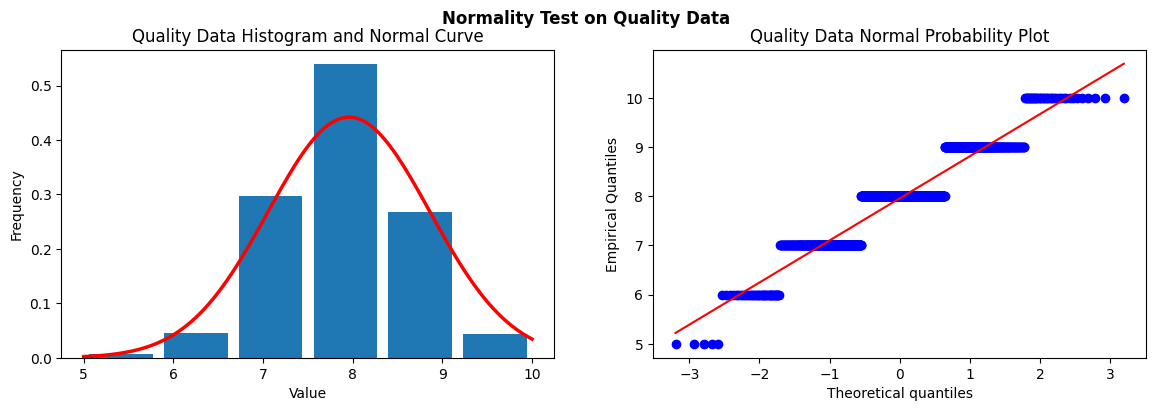

In [42]:
# Tes Normalitas Kolom Quality
normalityTest("Quality")

Berdasarkan tes uji hipotesis D'Agostino dan Pearson, didapatkan p-value sebesar 0.3888139394184818. Karena p-value lebih besar dari $\alpha$, maka dapat diambil keputusan bahwa hipotesis null H<sub>0</sub> yang menyebutkan bahwa data berasal dari populasi yang berdistribusi normal tidak ditolak. 

Meskipun demikian, visualisasi perbandingan histogram dengan kurva normal menunjukkan bahwa _tail_ kiri histogram sedikit lebih panjang dibandingkan _tail_ kanan histogram yang menginfikasikan _left/negative skew_. Hal ini juga terlihat dari nilai p-value yang cukup kecil jika dibandingkan dengan distribusi data normal lainnya yang menunjukkan bahwa distribusi data Quality tidak "senormal" yang lain.

Terjadi perbedaan besar pada visualisasi yang kedua. Berdasarkan visualisasi plot probabilitas normal, terlihat bahwa distribusi data Density tidak berada dalam satu garis dengan distribusi normal standar (garis merah). Terlihat bahwa data tersebar terhadap enam nilai (5, 6, 7, 8, 9, dan 10). Hal ini dapat terjadi karena data Quality merupakan data bertipe diskrit yang berusaha untuk dihampiri dengan distribusi normal yang bertipe kontinu. Akibatnya, plot probabilitas normal tidak menjadi visualisasi dan alat yang bagus untuk menentukan normalitas data Quality.

Meskipun visualisasi plot probabilitas normal tidak dapat mencerminkan distribusi data Quality dengan baik, dan terdapat sedikit perbedaan pada visualisasi perbandingan histogram dengan kurva normal, berdasarkan pertimbangan toleransi terhadap p-value yang telah dijelaskan dan hasil tes normalitas, dapat disimpulkan bahwa **data pada kolom Density berdistribusi secara normal.**

### SOAL 4 <a id="soal-4"></a>
---
---
Melakukan test hipotesis 1 sampel

Test hipotesis 1 sampel akan dilakukan dengan menerapkan langkah-langkah berikut:
1. Menentukan hipotesis null H<sub>0</sub>
2. Menentukan hipotesis alternatif H<sub>1</sub>
3. Menentukan tingkat signifikan $\alpha$
4. Menentukan uji statistik yang sesuai dan daerah kritis uji statistik
5. Menghitung nilai uji statistik dari sampel data atau menghitung p-value sesuai dengan uji statistik yang digunakan
6. Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis atau jika p-value lebih kecil dari $\alpha$, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis atau jika p-value tidak lebih kecil dari $\alpha$

Dalam seluruh test hipotesis pada soal 4, akan diambil tingkat signifikan $\alpha$ sebesar 0.05. Artinya, terdapat peluang sebesar 0.05 bahwa keputusan untuk menolak atau mendukung hipotesis null H<sub>0</sub> adalah salah. Dengan tingkat signifikan sebesar 0.05, diharapkan bahwa keputusan test hipotesis akan semakin mendekati kebenaran dan memberikan konsistensi keputusan yang tepat.

Test Hipotesis 1 Sampel akan dibagi menjadi beberapa bagian pengujian.

#### Bagian 4.a <a id="soal-4-1"></a>
---
Nilai rata-rata pH di atas 3.29?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap nilai rata-rata pH populasi dan mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} : \mu_{pH} = 3.29
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{pH} > 3.29
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 4, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>pH</sub> di atas 3.29 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat satu arah (_one-tailed test_) 
2. Nilai dari variansi pH populasi ($\sigma$<sub>pH</sub>) tidak diketahui

Dengan demikian, dibutuhkan uji statistik rataan 1 sampel dengan $\sigma$<sub>pH</sub> tidak diketahui yang memiliki daerah kritis berupa:

$$
t > t_{\alpha}  \text{ dengan v = n - 1}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $\overline{x}$ = 3.303610
2. $s$ = 0.104875
3. $\mu_{0}$ = 3.29
4. $n$ = 1000
5. $\alpha$ = 0.05

Data $\overline{x}$, $s$, dan $n$ diambil dari deskripsi statistik pH pada Soal 1.

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [97]:
xBar = 3.303610
s = 0.104875
mu = 3.29
n = 1000
alpha = 0.05

Kemudian akan dicari nilai t yang menghasilkan luas sebesar $\alpha$ di sisi kanan dengan nilai v yang bersesuaian

Kode dibawah akan menghitung nilai dari v dan $t_{\alpha}$

In [98]:
# Calculate and print the degree of freedom of t-values
v = n -1
print(f"Derajat kebebasan dari nilai t adalah v = n - 1 = {n} - 1 = {v}")

# Calculate and print the corresponding t values that give alpha in the right tail
tCrit = stats.t.ppf(1-alpha, v)
print(f"Nilai t dengan luas di sebelah kanan sebesar \u03B1 dengan v = {v} adalah {tCrit}")

Derajat kebebasan dari nilai t adalah v = n - 1 = 1000 - 1 = 999
Nilai t dengan luas di sebelah kanan sebesar α dengan v = 999 adalah 1.646380345427535


Dengan demikian, daerah kritis uji statistik berupa:

$$
t > 1.646380345427535
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
t = \frac{\overline{x} - \mu_{0}}{s / \sqrt{n}}
$$

Kode dibawah memberikan nilai uji statistik

In [99]:
# Calculate and print the statistic test value
t = (xBar - mu) / (s / (n**(0.5)))
print(f"Nilai dari uji statistik adalah t = {t}")

Nilai dari uji statistik adalah t = 4.103799661968184


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik t = 4.103799661968184

Karena nilai dari 4.103799661968184 > 1.646380345427535, maka **nilai uji statistik berada di dalam daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> ditolak** dan diambil kesimpulan bahwa **nilai $\mu_{pH}$ berada di atas 3.29**.

#### Bagian 4.b <a id="soal-4-2"></a>
---

Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap nilai rata-rata Residual Sugar populasi dan mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} : \mu_{residualSugar} = 2.50
$$

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{residualSugar} \ne 2.50
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 4, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>residualSugar</sub> tidak sama dengan 2.50 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari variansi Residual Sugar populasi ($\sigma$<sub>residualSugar</sub>) tidak diketahui

Dengan demikian, dibutuhkan uji statistik rataan 1 sampel dengan $\sigma$<sub>residualSugar</sub> tidak diketahui yang memiliki daerah kritis berupa:

$$
t > t_{\alpha / 2}  \text{ atau } t < -t_{\alpha / 2} \text{ dengan v = n - 1}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $\overline{x}$ = 2.567104
2. $s$ = 0.987915
3. $\mu_{0}$ = 2.50
4. $n$ = 1000
5. $\alpha$ = 0.05

Data $\overline{x}$, $s$, dan $n$  diambil dari deskripsi statistik Residual Sugar pada Soal 1.

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [100]:
xBar = 2.567104
s = 0.987915
mu = 2.50
n = 1000
alpha = 0.05

Kemudian akan dicari nilai t yang menghasilkan luas sebesar $\alpha$ / 2 di sisi kanan dengan nilai v yang bersesuaian

Kode dibawah akan menghitung nilai dari v dan $t_{\alpha / 2}$

In [101]:
halfAlpha = alpha / 2

# Calculate and print the degree of freedom of t-values
v = n -1
print(f"Derajat kebebasan dari nilai t adalah v = n - 1 = {n} - 1 = {v}")

# Calculate and print the corresponding t values that give alpha/2 in the right tail
tCrit = stats.t.ppf(1-halfAlpha, v)
print(f"Nilai t dengan luas di sebelah kanan sebesar \u03B1/2 dengan v = {v} adalah {tCrit}")

Derajat kebebasan dari nilai t adalah v = n - 1 = 1000 - 1 = 999
Nilai t dengan luas di sebelah kanan sebesar α/2 dengan v = 999 adalah 1.9623414611334487


Dengan demikian, daerah kritis uji statistik berupa:

$$
t > 1.9623414611334487 \text{ atau } t < - 1.9623414611334487
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
t = \frac{\overline{x} - \mu_{0}}{s / \sqrt{n}}
$$

Kode dibawah memberikan nilai uji statistik

In [102]:
# Calculate and print the statistic test value
t = (xBar - mu) / (s / (n**(0.5)))
print(f"Nilai dari uji statistik adalah t = {t}")

Nilai dari uji statistik adalah t = 2.147973055454559


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik t = 2.147973055454559

Karena nilai dari 2.147973055454559 > 1.9623414611334487, maka **nilai uji statistik berada di dalam daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> ditolak** dan diambil kesimpulan bahwa **nilai $\mu_{residualSugar}$ tidak sama dengan 2.50**.

#### Bagian 4.c <a id="soal-4-3"></a>
---
Nilai rata-rata 150 baris pertama kolom Sulphates bukan 0.65?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap nilai rata-rata 150 baris pertama kolom Sulphates populasi dan mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} : \mu_{150suplhates} = 0.65
$$

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{150sulphates} \ne 0.65
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 4, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>150sulphates</sub> tidak sama dengan 0.65 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari variansi 150 baris pertama kolom Sulphates populasi ($\sigma$<sub>150sulphates</sub>) tidak diketahui

Dengan demikian, dibutuhkan uji statistik rataan 1 sampel dengan $\sigma$<sub>150sulphates</sub> tidak diketahui yang memiliki daerah kritis berupa:

$$
t > t_{\alpha / 2}  \text{ atau } t < -t_{\alpha / 2} \text{ dengan v = n - 1}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $\mu_{0}$ = 0.65
2. $n$ = 150
3. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [103]:
mu = 0.65
n = 150
alpha = 0.05

Kemudian akan dicari nilai t yang menghasilkan luas sebesar $\alpha$ / 2 di sisi kanan dengan nilai v yang bersesuaian

Kode dibawah akan menghitung nilai dari v dan $t_{\alpha / 2}$

In [104]:
halfAlpha = alpha / 2

# Calculate and print the degree of freedom of t-values
v = n -1
print(f"Derajat kebebasan dari nilai t adalah v = n - 1 = {n} - 1 = {v}")

# Calculate and print the corresponding t values that give alpha/2 in the right tail
tCrit = stats.t.ppf(1-halfAlpha, v)
print(f"Nilai t dengan luas di sebelah kanan sebesar \u03B1/2 dengan v = {v} adalah {tCrit}")

Derajat kebebasan dari nilai t adalah v = n - 1 = 150 - 1 = 149
Nilai t dengan luas di sebelah kanan sebesar α/2 dengan v = 149 adalah 1.976013177679155


Dengan demikian, daerah kritis uji statistik berupa:

$$
t > 1.976013177679155 \text{ atau } t < -1.976013177679155
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
t = \frac{\overline{x} - \mu_{0}}{s / \sqrt{n}}
$$

Sebelumnya, harus dihitung terlebih dahulu nilai dari $\overline{x}$ dan $s$ dari 150 baris pertama kolom Sulphates   
Kode dibawah memberikan nilai $\overline{x}$ dan $s$ dari 150 baris pertama kolom Sulphates

In [105]:
# Get the first 150 row of Sulphates data from the datafame
sulphates150 = data["Sulphates"][0:150]

# Calculate and print the sample mean of sulphates
xBar = sulphates150.mean()
print(f"Rata-rata sampel dari 150 baris pertama kolom Sulphates = {xBar}")

# Calculate and print the sample mean of sulphates
s = sulphates150.std()
print(f"Simpangan sampel dari 150 baris pertama kolom Sulphates = {s}")

Rata-rata sampel dari 150 baris pertama kolom Sulphates = 0.6058666666666667
Simpangan sampel dari 150 baris pertama kolom Sulphates = 0.10886964477104125


Kode dibawah memberikan nilai uji statistik

In [106]:
# Calculate and print the statistic test value
t = (xBar - mu) / (s / (n**(0.5)))
print(f"Nilai dari uji statistik adalah t = {t}")

Nilai dari uji statistik adalah t = -4.964843393315918


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik t = -4.964843393315918

Karena nilai dari -4.964843393315918 < -1.976013177679155, maka **nilai uji statistik berada di dalam daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> ditolak** dan diambil kesimpulan bahwa **nilai $\mu_{150sulphates}$ tidak sama dengan 0.65**.

#### Bagian 4.d <a id="soal-4-4"></a>
---
Nilai rata-rata total sulfur dioxide di bawah 35?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap nilai rata-rata Total Sulfur Dioxide populasi dan mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} : \mu_{totalSulfurDioxide} = 35
$$

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{totalSulfurDioxide} < 35
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 4, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>totalSulfurDioxide</sub> di bawah 35 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat satu arah (_one-tailed test_) 
2. Nilai dari variansi Total Sulfur Dioxide populasi ($\sigma$<sub>totalSulfurDioxide</sub>) tidak diketahui

Dengan demikian, dibutuhkan uji statistik rataan 1 sampel dengan $\sigma$<sub>totalSulfurDioxide</sub> tidak diketahui yang memiliki daerah kritis berupa:
$$
t < -t_{\alpha}  \text{ dengan v = n - 1}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $\overline{x}$ = 40.290150
2. $s$ = 9.965767
3. $\mu_{0}$ = 35
4. $n$ = 1000
5. $\alpha$ = 0.05

Data $\overline{x}$, $s$, dan $n$ diambil dari deskripsi statistik Total Sulfur Dioxide pada Soal 1.

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [107]:
xBar = 40.290150
s = 9.965767
mu = 35
n = 1000
alpha = 0.05

Kemudian akan dicari nilai t yang menghasilkan luas sebesar $\alpha$ di sisi kanan dengan nilai v yang bersesuaian

Kode dibawah akan menghitung nilai dari v dan $t_{\alpha}$

In [108]:
# Calculate and print the degree of freedom of t-values
v = n -1
print(f"Derajat kebebasan dari nilai t adalah v = n - 1 = {n} - 1 = {v}")

# Calculate and print the corresponding t values that give alpha in the right tail
tCrit = stats.t.ppf(1-alpha, v)
print(f"Nilai t dengan luas di sebelah kanan sebesar \u03B1 dengan v = {v} adalah {tCrit}")

Derajat kebebasan dari nilai t adalah v = n - 1 = 1000 - 1 = 999
Nilai t dengan luas di sebelah kanan sebesar α dengan v = 999 adalah 1.646380345427535


Dengan demikian, daerah kritis uji statistik berupa:

$$
t < -1.646380345427535
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
t = \frac{\overline{x} - \mu_{0}}{s / \sqrt{n}}
$$

Kode dibawah memberikan nilai uji statistik

In [109]:
# Calculate and print the statistic test value
t = (xBar - mu) / (s / (n**(0.5)))
print(f"Nilai dari uji statistik adalah t = {t}")

Nilai dari uji statistik adalah t = 16.786388006000685


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik t = 16.786388006000685

Karena nilai dari 16.786388006000685 > -1.646380345427535, maka **nilai uji statistik berada di luar daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> diterima** dan diambil kesimpulan bahwa **nilai $\mu_{totalSulfurDioxide}$ tidak di bawah dari 35**.

#### Bagian 4.e <a id="soal-4-5"></a>
---
Proporsi nilai Total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap nilai proporsi Total Sulfur Dioxide populasi yang lebih dari 40 dan mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} : p_{totalSulfurDioxide40} = 0.5
$$

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : p_{totalSulfurDioxide40} \ne 0.5
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 4, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $p$<sub>totalSulfurDioxide40</sub> tidak sama dengan 0.5 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari n (jumlah sampel sebanyak 1000) cukup besar

Dengan demikian, dibutuhkan uji statistik proporsi 1 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z > z_{\alpha / 2}  \text{ atau } z < -z_{\alpha / 2}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $p_{0}$ = 0.5
2. $n$ = 1000
3. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [110]:
p0 = 0.5
n = 1000
alpha = 0.05

Kemudian akan dicari nilai z yang menghasilkan luas sebesar $\alpha$ / 2 di sisi kanan.

Kode dibawah akan menghitung nilai $z_{\alpha / 2}$

In [111]:
halfAlpha = alpha/2

# Calculate and print the corresponding z values that give alpha/2 in the right tail
zCrit = stats.norm.ppf(1-halfAlpha)
print(f"Nilai z dengan luas di sebelah kanan sebesar \u03B1/2 adalah {zCrit}")

Nilai z dengan luas di sebelah kanan sebesar α/2 adalah 1.959963984540054


Dengan demikian, daerah kritis uji statistik berupa:

$$
z > 1.959963984540054 \text{ atau } z < -1.959963984540054
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
z = \frac{\overline{p} - p_{0}}{\sqrt{p_{0}q_{0} / n}}
$$

Sebelumnya, harus dihitung terlebih dahulu nilai dari $\overline{p}$ dan $q_{0}$ dari kolom Total Sulfur Dioxide  
Kode dibawah memberikan nilai $\overline{p}$ dan $q_{0}$ dari kolom Total Sulfur Dioxide

In [112]:
# Get the data of Total Sulfur Dioxide from the datafame that is more than 40
totalSulfurDioxide40 = data["Total Sulfur Dioxide"].loc[data["Total Sulfur Dioxide"] > 40]

# Calculate and print the sample proportion of total sulfur dioxide that is more than 40
p = totalSulfurDioxide40.count() / n
print(f"Proporsi sampel dari kolom Total Sulfur Dioxide dengan nilai lebih dari 40 = {p}")

# Calculate and print the q0 of total sulfur dioxide
q0 = 1-p0
print(f"Nilai dari q0 = {q0}")

Proporsi sampel dari kolom Total Sulfur Dioxide dengan nilai lebih dari 40 = 0.512
Nilai dari q0 = 0.5


Kode dibawah memberikan nilai uji statistik

In [113]:
# Calculate and print the statistic test value
z = (p - p0) / (((p0*q0) / n)**(0.5))
print(f"Nilai dari uji statistik adalah z = {z}")

Nilai dari uji statistik adalah z = 0.7589466384404118


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik z = 0.7589466384404118

Karena nilai dari 0.7589466384404118 < 1.959963984540054 dan 0.7589466384404118 > -1.959963984540054 , maka **nilai uji statistik berada di luar daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> diterima** dan diambil kesimpulan bahwa **nilai $p_{totalSulfurDioxide40}$ sama dengan 0.5**.

### SOAL 5 <a id="soal-5"></a>
---
---
Melakukan test hipotesis 2 sampel

Test hipotesis 2 sampel akan dilakukan dengan menerapkan langkah-langkah berikut:
1. Menentukan hipotesis null H<sub>0</sub>
2. Menentukan hipotesis alternatif H<sub>1</sub>
3. Menentukan tingkat signifikan $\alpha$
4. Menentukan uji statistik yang sesuai dan daerah kritis uji statistik
5. Menghitung nilai uji statistik dari sampel data atau menghitung p-value sesuai dengan uji statistik yang digunakan
6. Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis atau jika p-value lebih kecil dari $\alpha$, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis atau jika p-value tidak lebih kecil dari $\alpha$

Dalam seluruh test hipotesis pada soal 5, akan diambil tingkat signifikan $\alpha$ sebesar 0.05. Artinya, terdapat peluang sebesar 0.05 bahwa keputusan untuk menolak atau mendukung hipotesis null H<sub>0</sub> adalah salah. Dengan tingkat signifikan sebesar 0.05, diharapkan bahwa keputusan test hipotesis akan semakin mendekati kebenaran dan memberikan konsistensi keputusan yang tepat.

Test Hipotesis 2 Sampel akan dibagi menjadi beberapa bagian pengujian.

#### Bagian 5.a <a id="soal-5-1"></a>
---
Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Pada nomor 5.a ini, asumsinya adalah fixed acidity awal merupakan populasi 1 dan fixed acidity akhir merupakan populasi 2.

Sehingga, variansi awal dan variansi akhir populasi diketahui. Sampelnya berupa populasinya.

Jadi, digunakan rumus var. awal dan var. akhir populasi diketahui.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap data kolom fxed acidity bagian awal dan akhir serta mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} : \mu_{awal} = \mu_{akhir}
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{awal} \ne \mu_{akhir}
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 5, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>fixed acidity awal</sub> sama dengan $\mu$<sub>fixed acidity akhir</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari n (jumlah sampel sebanyak 1000) cukup besar

Dengan demikian, dibutuhkan uji statistik proporsi 2 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z > z_{\alpha / 2}  \text{ atau } z < -z_{\alpha / 2}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $n_{awal}$ = 500
1. $n_{akhir}$ = 500
1. $\mu_{awal}$ = 7.15352
1. $\mu_{akhir}$ = 7.15154
1. $\sigma_{awal}$ = 1.45188
1. $\sigma_{akhir}$ = 1.43868
2. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [114]:
# Populasi
fixed_acidity_awal = data["Fixed Acidity"].iloc[0:500]
fixed_acidity_akhir = data["Fixed Acidity"].iloc[500:1000]

# Diketahui
n_awal = fixed_acidity_awal.count()
n_akhir = fixed_acidity_akhir.count()
miu_awal = fixed_acidity_awal.mean()
miu_akhir = fixed_acidity_akhir.mean()
var_awal = fixed_acidity_awal.var()
var_akhir = fixed_acidity_akhir.var()

Kemudian akan dicari nilai z yang menghasilkan luas sebesar $\alpha$ / 2 di sisi kanan.

Kode dibawah akan menghitung nilai $z_{\alpha / 2}$

In [115]:
halfAlpha = alpha/2

# Calculate and print the corresponding z values that give alpha/2 in the right tail
zCrit = stats.norm.ppf(1-halfAlpha)
print(f"Nilai z dengan luas di sebelah kanan sebesar \u03B1/2 adalah {zCrit}")

Nilai z dengan luas di sebelah kanan sebesar α/2 adalah 1.959963984540054


Dengan demikian, daerah kritis uji statistik berupa:

$$
z > 1.959963984540054 \text{ atau } z < -1.959963984540054
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
z = \frac{\mu_{awal} - \mu_{akhir}}{\sqrt{\sigma_{awal} / n_{awal} + \sigma_{akhir} / n_{akhir}}}
$$

Kode dibawah memberikan nilai uji statistik

In [116]:
z_value = ((miu_awal - miu_akhir)) / (((var_awal/n_awal) + (var_akhir/n_akhir)) ** 0.5)
p_value = stats.norm.sf(abs(z_value))*2

print(f"Probabilitas Nilai dari uji statistik adalah p = {p_value}")
print(f"Nilai dari uji statistik adalah z = {z_value}")

Probabilitas Nilai dari uji statistik adalah p = 0.9792245804254097
Nilai dari uji statistik adalah z = 0.02604106999906379


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik z = 0.02604106999906379

Karena nilai dari 0.02604106999906379 < 1.959963984540054 dan 0.02604106999906379 > -1.959963984540054 , maka **nilai uji statistik berada di luar daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> diterima** dan diambil kesimpulan bahwa **nilai $\mu$<sub>fixed acidity awal</sub> sama dengan $\mu$<sub>fixed acidity akhir</sub>**.

#### Bagian 5.b <a id="soal-5-2"></a>
---
Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

Pada nomor 5.b ini, asumsinya adalah chlorides awal merupakan populasi 1 dan chlorides akhir merupakan populasi 2.

Sehingga, variansi awal dan variansi akhir populasi diketahui. Sampelnya berupa populasinya.

Jadi, digunakan rumus var. awal dan var. akhir populasi diketahui.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap data nilai rata-rata kolom chlorides dan mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} :\mu_{awal} - \mu_{akhir} = 0.001
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{awal} - \mu_{akhir} \ne 0.001
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 5, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu_{awal}$ lebih besar daripada $\mu_{akhir}$ sebesar 0.001 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat satu arah (_one-tailed test_) 
2. Nilai dari n (jumlah sampel sebanyak 1000) cukup besar

Dengan demikian, dibutuhkan uji statistik proporsi 2 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z > z_{\alpha / 2}  \text{ atau } z < -z_{\alpha / 2}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $n_{awal}$ = 500
1. $n_{akhir}$ = 500
1. $\overline{x}_{awal}$ = 0.0813978263367367
1. $\overline{x}_{akhir}$ = 0.08099247867896281
1. $\sigma_{awal}$ = 0.00040667352898471836
1. $\sigma_{akhir}$ = 0.00040293091542206646
2. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [117]:
# Populasi
chlorides_awal = data["Chlorides"].iloc[0:500]
chlorides_akhir = data["Chlorides"].iloc[500:1000]

# Diketahui
n_awal = chlorides_awal.count()
n_akhir = chlorides_akhir.count()
miu_awal = chlorides_awal.mean()
miu_akhir = chlorides_akhir.mean()
var_awal = chlorides_awal.var()
var_akhir = chlorides_akhir.var()

Kemudian akan dicari nilai z yang menghasilkan luas sebesar $\alpha$ / 2 di sisi kanan.

Kode dibawah akan menghitung nilai $z_{\alpha / 2}$

In [118]:
halfAlpha = alpha/2

# Calculate and print the corresponding z values that give alpha/2 in the right tail
zCrit = stats.norm.ppf(1-halfAlpha)
print(f"Nilai z dengan luas di sebelah kanan sebesar \u03B1/2 adalah {zCrit}")

Nilai z dengan luas di sebelah kanan sebesar α/2 adalah 1.959963984540054


Dengan demikian, daerah kritis uji statistik berupa:

$$
z > 1.959963984540054 \text{ atau } z < -1.959963984540054
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
z = \frac{\mu_{awal} - \mu_{akhir} - 0.001}{\sqrt{\sigma_{awal} / n_{awal} + \sigma_{akhir} / n_{akhir}}}
$$

Kode dibawah memberikan nilai uji statistik

In [119]:
z_value = ((miu_awal - miu_akhir) - 0.001) / (((var_awal/n_awal) + (var_akhir/n_akhir)) ** 0.5)
p_value = stats.norm.sf(abs(z_value))*2

print(f"Probabilitas Nilai dari uji statistik adalah p = {p_value}")
print(f"Nilai dari uji statistik adalah z = {z_value}")

Probabilitas Nilai dari uji statistik adalah p = 0.640273007581107
Nilai dari uji statistik adalah z = -0.4673171228521319


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik z = 0.012889014443972833

Karena nilai dari 0.012889014443972833 < 1.959963984540054 dan 0.012889014443972833 > -1.959963984540054 , maka **nilai uji statistik berada di luar daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> diterima** dan diambil kesimpulan bahwa **nilai $\mu$<sub>chlorides awal</sub> lebih besar dari $\mu$<sub>chlorides akhir</sub> sebesar 0.001**.

#### Bagian 5.c <a id="soal-5-3"></a>
---
Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

Pada nomor 5.c ini, asumsinya adalah 25 baris Volatile Acidity awal merupakan populasi 1 dan 25 baris Sulphates awal merupakan populasi 2.

Sehingga, variansi awal dan variansi akhir populasi diketahui. Sampelnya berupa populasinya.

Jadi, digunakan rumus var. awal dan var. akhir populasi diketahui.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap data nilai rata-rata 25 baris pertama kolom Volatile Acidity dan data nilai rata-rata 25 baris pertama kolom Sulphates serta mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} :\mu_{awal} = \mu_{akhir}
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_{awal} \ne \mu_{akhir}
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 5, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>volatile acidity awal</sub> sama dengan $\mu$<sub>sulphates awal</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari n (jumlah sampel sebanyak 1000) cukup besar

Dengan demikian, dibutuhkan uji statistik proporsi 2 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z > z_{\alpha / 2}  \text{ atau } z < -z_{\alpha / 2}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $n_{volatile acidity}$ = 25
2. $n_{sulphates}$ = 25
3. $\mu_{volatile acidity}$ = 0.501424
4. $\mu_{sulphates}$ = 0.5768
5. $\sigma_{volatile acidity}$ = 0.006954321066666667
6. $\sigma_{sulphates}$ = 0.013464333333333333
7. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [120]:
# Populasi
volatile_acidity = data["Volatile Acidity"].iloc[0:25]
sulphates = data["Sulphates"].iloc[0:25]

# Diketahui
n_volatile_acidity = volatile_acidity.count()
n_sulphates = sulphates.count()
miu_volatile_acidity = volatile_acidity.mean()
miu_sulphates = sulphates.mean()
var_volatile_acidity = volatile_acidity.var()
var_sulphates = sulphates.var()

Kemudian akan dicari nilai z yang menghasilkan luas sebesar $\alpha$ / 2 di sisi kanan.

Kode dibawah akan menghitung nilai $z_{\alpha / 2}$

In [121]:
halfAlpha = alpha/2

# Calculate and print the corresponding z values that give alpha/2 in the right tail
zCrit = stats.norm.ppf(1-halfAlpha)
print(f"Nilai z dengan luas di sebelah kanan sebesar \u03B1/2 adalah {zCrit}")

Nilai z dengan luas di sebelah kanan sebesar α/2 adalah 1.959963984540054


Dengan demikian, daerah kritis uji statistik berupa:

$$
z > 1.959963984540054 \text{ atau } z < -1.959963984540054
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
z = \frac{\mu_{volatile acidity} - \mu_{sulphates}}{\sqrt{\sigma_{volatile acidity} / n_{volatile acidity} + \sigma_{sulphates} / n_{sulphates}}}
$$

Kode dibawah memberikan nilai uji statistik

In [122]:
z_value = ((miu_volatile_acidity - miu_sulphates)) / (((var_volatile_acidity/n_volatile_acidity) + (var_sulphates/n_sulphates)) ** 0.5)
p_value = stats.norm.sf(abs(z_value))*2

print(f"Probabilitas Nilai dari uji statistik adalah p = {p_value}")
print(f"Nilai dari uji statistik adalah z = {z_value}")

Probabilitas Nilai dari uji statistik adalah p = 0.00835240168545375
Nilai dari uji statistik adalah z = -2.63748216767487


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik z = -2.63748216767487

Karena nilai dari -2.63748216767487 < -1.959963984540054 , maka **nilai uji statistik berada di dalam daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> ditolak** dan diambil kesimpulan bahwa **nilai $\mu$<sub>25 baris pertama Volatile Acidity</sub> tidak sama dengan $\mu$<sub>25 baris pertama Sulphates</sub>**.

#### Bagian 5.d <a id="soal-5-4"></a>
---
Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

Pada nomor 5.d ini, asumsinya adalah populasi residual sugar awal merupakan populasi 1 dan populasi residual sugar akhir merupakan populasi 2.

Sehingga, variansi awal dan variansi akhir populasi diketahui. Sampelnya berupa populasinya.

Jadi, digunakan rumus var. awal dan var. akhir populasi diketahui.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap data nilai variansi kolom residual sugar awal dan data nilai variansi kolom residual sugar akhir serta mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} :{\sigma_{awal}}^2 = {\sigma_{akhir}}^2
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : {\sigma_{awal}}^2 \ne {\sigma_{akhir}}^2
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 5, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\sigma$<sub>residual sugar awal</sub> sama dengan $\sigma$<sub>residual sugar akhir</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari n (jumlah sampel sebanyak 1000) cukup besar

Dengan demikian, dibutuhkan uji statistik proporsi 2 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z > z_{\alpha / 2}  \text{ atau } z < -z_{\alpha / 2}
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $v_{Residual Sugar Awal}$ = 499
2. $v_{Residual Sugar Akhir}$ = 499
3. $s_{Residual Sugar Awal}$ = 0.9735354248789823
4. $s_{Residual Sugar Akhir}$ = 1.0030564181446286
5. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [123]:
# Populasi
residual_sugar_awal = data["Residual Sugar"].iloc[0:500]
residual_sugar_akhir = data["Residual Sugar"].iloc[500:1000]

# Diketahui
v_awal = residual_sugar_awal.count() - 1
v_akhir = residual_sugar_akhir.count() - 1
s_awal = residual_sugar_awal.std()
s_akhir = residual_sugar_akhir.std()

Kemudian akan dicari nilai f.

Kode dibawah akan menghitung nilai $f1_{(\alpha / 2)}$ dan $f2_{(1-(\alpha / 2))}$

In [124]:
halfAlpha = alpha/2

# Calculate and print the corresponding z values that give alpha/2 in the right tail
fCritLow = stats.f.ppf(halfAlpha, v_awal, v_akhir)
fCritHigh = stats.f.ppf(1-halfAlpha, v_awal, v_akhir)
print(f"Nilai f1 adalah {fCritLow} dan nilai f2 adalah {fCritHigh}")

Nilai f1 adalah 0.8388857772763105 dan nilai f2 adalah 1.1920574017201653


Dengan demikian, daerah kritis uji statistik berupa:

$$
f > 1.1920574017201653 \text{ atau } f < 0.8388857772763105
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
f = \frac{{s_{awal}}^2}{{s_{akhir}}^2}
$$

Kode dibawah memberikan nilai uji statistik

In [125]:
if (s_awal > s_akhir) :
    f_value = s_awal**2 / s_akhir**2
else :
    f_value = s_akhir**2 / s_awal**2

p_value = (1-stats.f.cdf(f_value, v_akhir, v_awal))*2

print(f"Probabilitas Nilai dari uji statistik adalah p = {p_value}")
print(f"Nilai dari uji statistik adalah f = {f_value}")

Probabilitas Nilai dari uji statistik adalah p = 0.5048203595246195
Nilai dari uji statistik adalah f = 1.0615664973153538


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik f = 1.0615664973153538

Karena nilai dari 1.0615664973153538 > 0.8388857772763105 , maka **nilai uji statistik berada di luar daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> tidak ditolak** dan diambil kesimpulan bahwa **nilai $\sigma^2$<sub>awal Residu Sugar</sub> sama dengan $\sigma^2$<sub>akhir Residu Sugar</sub>**.

#### Bagian 5.e <a id="soal-5-5"></a>
---
Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

Pada nomor 5.e ini, asumsinya adalah setengah bagian alcohol awal yang lebih dari 7 merupakan populasi 1 dan setengah bagian alcohol akhir yang lebih dari 7 merupakan populasi 2.

Sehingga, variansi awal dan variansi akhir populasi diketahui. Sampelnya berupa populasinya.

Jadi, digunakan rumus var. awal dan var. akhir populasi diketahui.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap data nilai proporsi alcohol awal dan data nilai proposi alcohol akhir serta mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} :p_{awal} = p_{akhir}
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : p_{awal} > p_{akhir}
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 5, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\sigma$<sub>alcohol awal</sub> sama dengan $\sigma$<sub>alcohol akhir</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat satu arah (_one-tailed test_) 
2. Nilai dari n (jumlah sampel sebanyak 1000) cukup besar

Dengan demikian, dibutuhkan uji statistik proporsi 2 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z > z_{\alpha}  
$$

Akan didefinisikan terlebih dahulu semua data yang diketahui mengenai test hipotesis berupa:
1. $n_{Alcohol Awal}$ = 500
2. $n_{Alcohol Akhir}$ = 500
3. $total_{Alcohol Awal}$ = 495
4. $total_{Alcohol Akhir}$ = 495
5. $p_{Alcohol Awal}$ = 0.99
6. $p_{Alcohol Akhir}$ = 0.99
7. $\alpha$ = 0.05

Kode dibawah mendefinisikan semua data yang diperlukan untuk melakukan perhitungan.

In [126]:
# Populasi
alcohol_awal = data["Alcohol"].iloc[0:500]
alcohol_akhir = data["Alcohol"].iloc[500:1000]

# Diketahui
n_alcohol_awal = alcohol_awal.count()
n_alcohol_akhir = alcohol_akhir.count()
total_alcohol_awal = 0
for i in alcohol_awal:
    if (i > 7) :
        total_alcohol_awal += 1

total_alcohol_akhir = 0
for i in alcohol_akhir:
    if (i > 7) :
        total_alcohol_akhir += 1
p_awal = total_alcohol_awal / n_alcohol_awal
p_akhir = total_alcohol_akhir / n_alcohol_akhir
p = (total_alcohol_awal + total_alcohol_akhir) / (n_alcohol_awal + n_alcohol_akhir)
q = 1 - p

Kemudian akan dicari nilai z yang menghasilkan luas sebesar $\alpha$ di sisi kanan.

Kode dibawah akan menghitung nilai $z_{\alpha}$

In [127]:
# Calculate and print the corresponding z values that give alpha in the right tail
zCrit = stats.norm.ppf(1-alpha)
print(f"Nilai z dengan luas di sebelah kanan sebesar \u03B1 adalah {zCrit}")

Nilai z dengan luas di sebelah kanan sebesar α adalah 1.6448536269514722


Dengan demikian, daerah kritis uji statistik berupa:

$$
z > 1.6448536269514722
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
z = \frac{p_{Alcohol Awal} - p_{Alcohol Akhir}}{\sqrt{p  q (\frac{1}{n Alcohol Awal}) (\frac{1}{n Alcohol Akhir})}}
$$

Kode dibawah memberikan nilai uji statistik

In [128]:
z_value = (p_awal - p_akhir ) / ((p * q * (1 / n_awal + 1 / n_akhir)) ** 0.5)
p_value = stats.norm.sf(abs(z_value))

print(f"Probabilitas Nilai dari uji statistik adalah p = {p_value}")
print(f"Nilai dari uji statistik adalah z = {z_value}")

Probabilitas Nilai dari uji statistik adalah p = 0.5
Nilai dari uji statistik adalah z = 0.0


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis, atau menerima hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik z = 0.0

Karena nilai dari 0.0 < 1.6448536269514722 , maka **nilai uji statistik berada di luar daerah kritis uji statistik**. Dengan demikian, **hipotesis null H<sub>0</sub> tidak ditolak** dan diambil kesimpulan bahwa **nilai proporsi awal Alcohol yang lebih dari 7 sama dengan nilai proporsi akhir Alcohol yang lebih dari 7**.